## Fashion sales project

This project aims to gain insights into the fashion market and optimize the selling process by leveraging on the available fashion sales data and using different machine-learning solutions.

#### Workflow of the project
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Data Collection
- Dataset source: https://www.kaggle.com/datasets/a23bisola/fashion-dataset-uk-us/data

In [1]:
# Load needed packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ============================= Plot features ================================ #
# Properties to decorate the plots.
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'   
plt.rcParams['font.sans-serif'] = 'New Century Schoolbook' # 'Times', 'Liberation Serif', 'Times New Roman'
#plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['font.size'] = 20
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.markerscale'] = 1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width']= 0.5
plt.rcParams['xtick.major.size']= 5.0
plt.rcParams['xtick.minor.width']= 0.5
plt.rcParams['xtick.minor.size']= 3.0
plt.rcParams['ytick.major.width']= 0.5
plt.rcParams['ytick.major.size']= 5.0
plt.rcParams['ytick.minor.width']= 0.5
plt.rcParams['ytick.minor.size']= 3.0
# ============================================================================ #

Let us get some information of the dataset

In [3]:
# Load the dataset
df = pd.read_csv('data/mock_fashion_data_uk_us.csv')

In [4]:
# Print the first five lines
df.head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [5]:
# Print the shape of the dataset
df.shape

(1000000, 20)

#### 2) Data checks to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
# Check if there are missing values in each column of the dataset
df.isna().sum()

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64

In [7]:
# Check if there are duplicated data in the dataset
df.duplicated().sum()

0

In [8]:
# Print info on each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Product Name                  1000000 non-null  object 
 1   Price                         1000000 non-null  float64
 2   Brand                         1000000 non-null  object 
 3   Category                      1000000 non-null  object 
 4   Description                   1000000 non-null  object 
 5   Rating                        1000000 non-null  float64
 6   Review Count                  1000000 non-null  int64  
 7   Style Attributes              1000000 non-null  object 
 8   Total Sizes                   1000000 non-null  object 
 9   Available Sizes               1000000 non-null  object 
 10  Color                         1000000 non-null  object 
 11  Purchase History              1000000 non-null  object 
 12  Age                          

In [9]:
# Check unique values in each column
df.nunique()

Product Name                      67600
Price                           1000000
Brand                                 8
Category                             10
Description                           7
Rating                          1000000
Review Count                        500
Style Attributes                     10
Total Sizes                           3
Available Sizes                       4
Color                                 4
Purchase History                     10
Age                                  47
Fashion Magazines                    10
Fashion Influencers                  10
Season                                6
Time Period Highest Purchase          5
Customer Reviews                      5
Social Media Comments                 6
feedback                              6
dtype: int64

In [10]:
# Get some statistical information regarding the non-categorical variables of the dataset
df.describe()

,Price,Rating,Review Count,Age
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,55.001428,2.998454,249.602431,41.004191
std,25.979720,1.154696,144.362645,13.565907
min,10.000145,1.000000,0.000000,18.000000
25%,32.496717,1.998608,125.000000,29.000000
50%,55.007413,2.996328,249.000000,41.000000
75%,77.511242,3.998479,375.000000,53.000000
max,99.999648,4.999999,499.000000,64.000000


In [11]:
# Print the unique values of the categorical variables
print("Categories in 'Brand' variable: ")
print(df['Brand'].unique(), "\n")

print("Categories in 'Category' variable: ")
print(df['Category'].unique(), "\n")

print("Categories in 'Description' variable: ")
print(df['Description'].unique(), "\n")

print("Categories in 'Style Attributes' variable: ")
print(df['Style Attributes'].unique(), "\n")

print("Categories in 'Total Sizes' variable: ")
print(df['Total Sizes'].unique(), "\n")

print("Categories in 'Available Sizes' variable: ")
print(df['Available Sizes'].unique(), "\n")

print("Categories in 'Color' variable: ")
print(df['Color'].unique(), "\n")

print("Categories in 'Purchase History' variable: ")
print(df['Purchase History'].unique(), "\n")

print("Categories in 'Fashion Magazines' variable: ")
print(df['Fashion Magazines'].unique(), "\n")

print("Categories in 'Fashion Influencers' variable: ")
print(df['Fashion Influencers'].unique(), "\n")

print("Categories in 'Season' variable: ")
print(df['Season'].unique(), "\n")

print("Categories in 'Time Period Highest Purchase' variable: ")
print(df['Time Period Highest Purchase'].unique(), "\n")

print("Categories in 'Customer Reviews' variable: ")
print(df['Customer Reviews'].unique(), "\n")

print("Categories in 'Social Media Comments' variable: ")
print(df['Social Media Comments'].unique(), "\n")

print("Categories in 'feedback' variable: ")
print(df['feedback'].unique(), "\n")

Categories in 'Brand' variable: 
['Ralph Lauren' 'Ted Baker' 'Jigsaw' 'Alexander McQueen' 'Tommy Hilfiger'
 'Calvin Klein' 'Mulberry' 'Burberry'] 

Categories in 'Category' variable: 
['Footwear' 'Tops' 'Outerwear' 'Bottoms' 'Accessories' 'Dresses'
 'Swimwear' 'Activewear' 'Lingerie' 'Jewelry'] 

Categories in 'Description' variable: 
['Bad' 'Not Good' 'Very Bad' 'Very Good' 'Best' 'Good' 'Worst'] 

Categories in 'Style Attributes' variable: 
['Streetwear' 'Vintage' 'Formal' 'Sporty' 'Edgy' 'Minimalist' 'Preppy'
 'Glamorous' 'Casual' 'Bohemian'] 

Categories in 'Total Sizes' variable: 
['M, L, XL' 'S, M, L' 'S, L, XL'] 

Categories in 'Available Sizes' variable: 
['XL' 'M' 'L' 'S'] 

Categories in 'Color' variable: 
['Green' 'Black' 'Blue' 'Red'] 

Categories in 'Purchase History' variable: 
['Medium' 'Above Average' 'Average' 'Very High' 'Negligible' 'Very Low'
 'Significant' 'Below Average' 'Low' 'High'] 

Categories in 'Fashion Magazines' variable: 
['Vogue' 'Glamour' 'Marie Claire'

In [12]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}\n'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features: ['Price', 'Rating', 'Review Count', 'Age']

We have 16 categorical features: ['Product Name', 'Brand', 'Category', 'Description', 'Style Attributes', 'Total Sizes', 'Available Sizes', 'Color', 'Purchase History', 'Fashion Magazines', 'Fashion Influencers', 'Season', 'Time Period Highest Purchase', 'Customer Reviews', 'Social Media Comments', 'feedback']


#### 3) Exploring Data (Visualization)

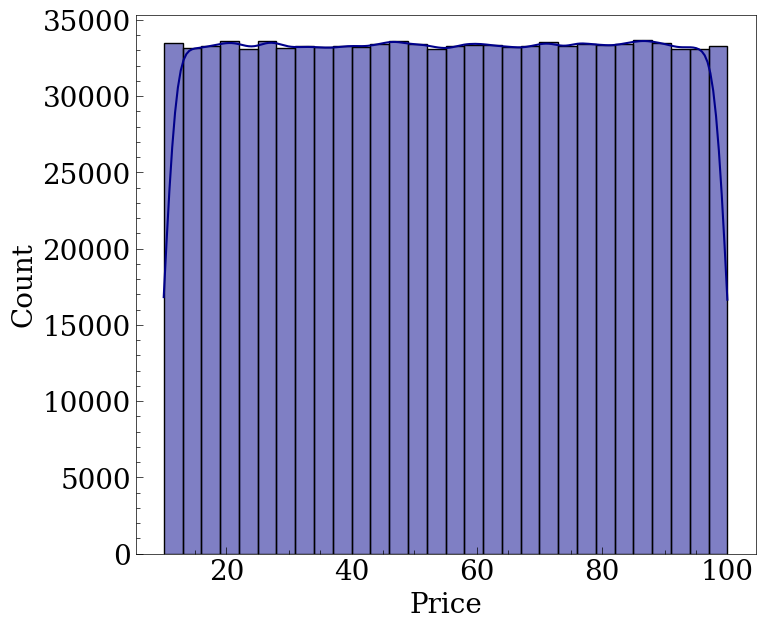

In [33]:
# Histogram of Price feature
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df, x='Price', bins=30, kde=True, color='darkblue', figure=fig)
plt.show()

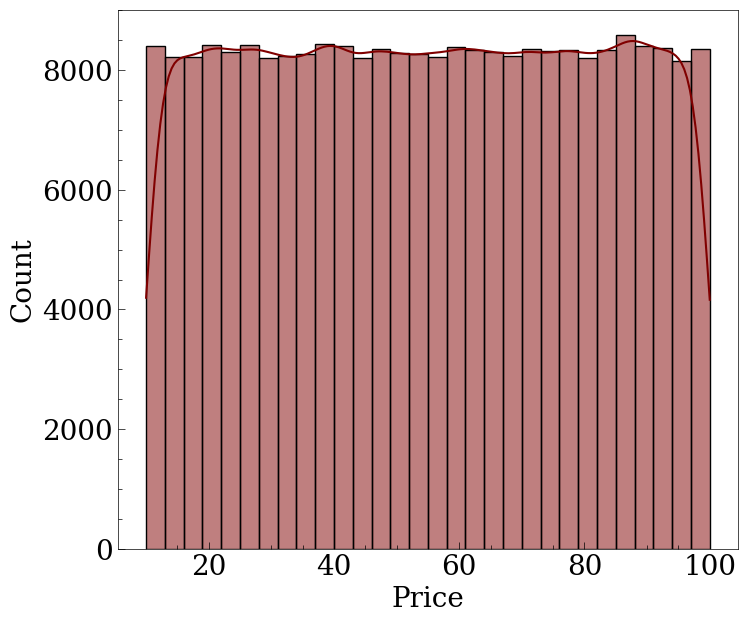

In [42]:
# Histogram of Price feature for best ratings
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df[df.Rating >= 4.0], x='Price', bins=30, kde=True, color='maroon', figure=fig)
plt.show()

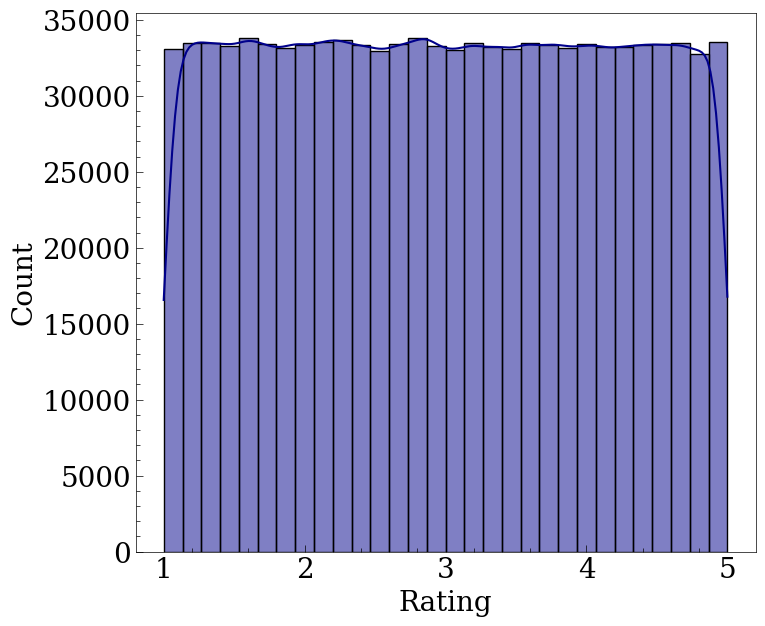

In [34]:
# Histogram of Rating feature
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df, x='Rating', bins=30, kde=True, color='darkblue', figure=fig)
plt.show()

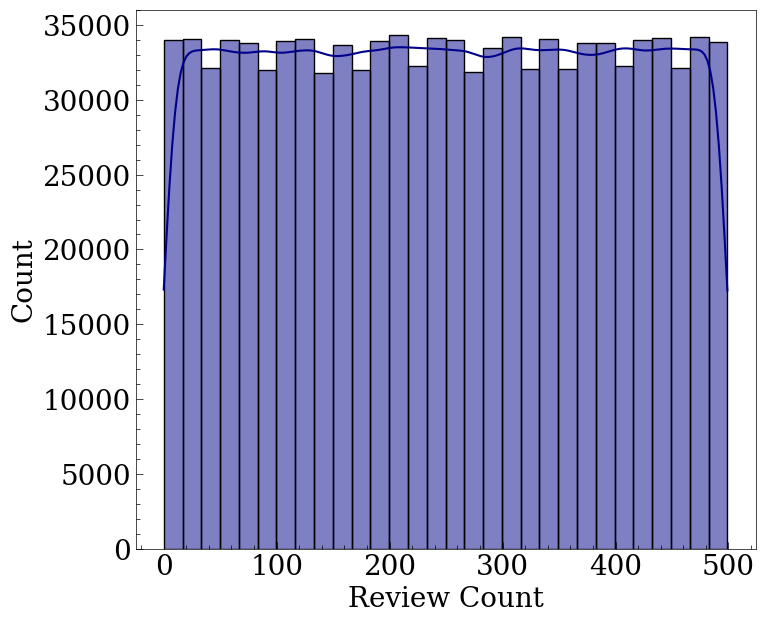

In [35]:
# Histogram of Review Count feature
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df, x='Review Count', bins=30, kde=True, color='darkblue', figure=fig)
plt.show()

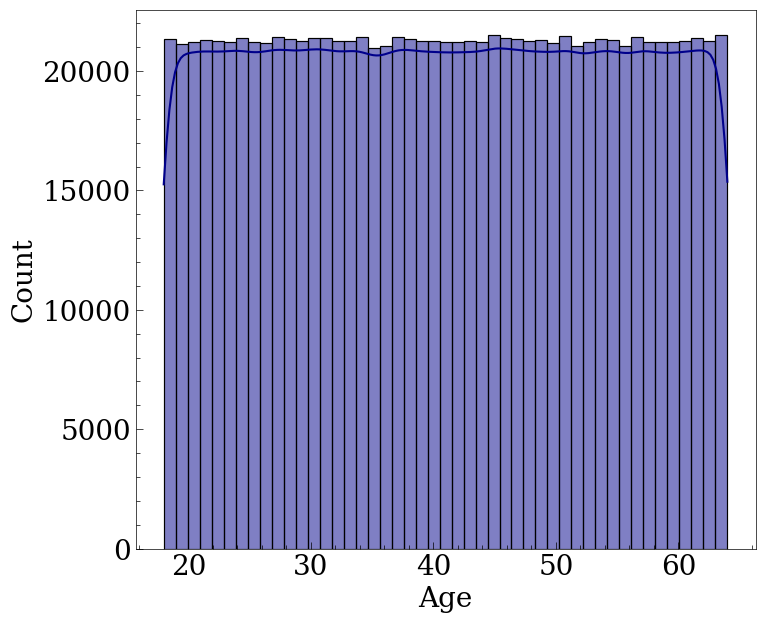

In [40]:
# Histogram of Age feature
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df, x='Age', bins=47, kde=True, color='darkblue', figure=fig)
plt.show()

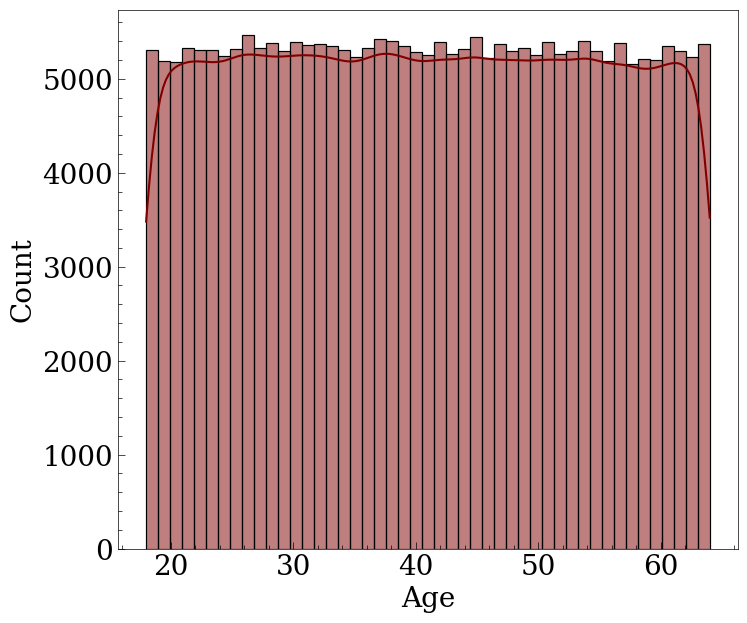

In [43]:
# Histogram of Age feature
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(data=df[df.Rating >= 4.0], x='Age', bins=47, kde=True, color='maroon', figure=fig)
plt.show()

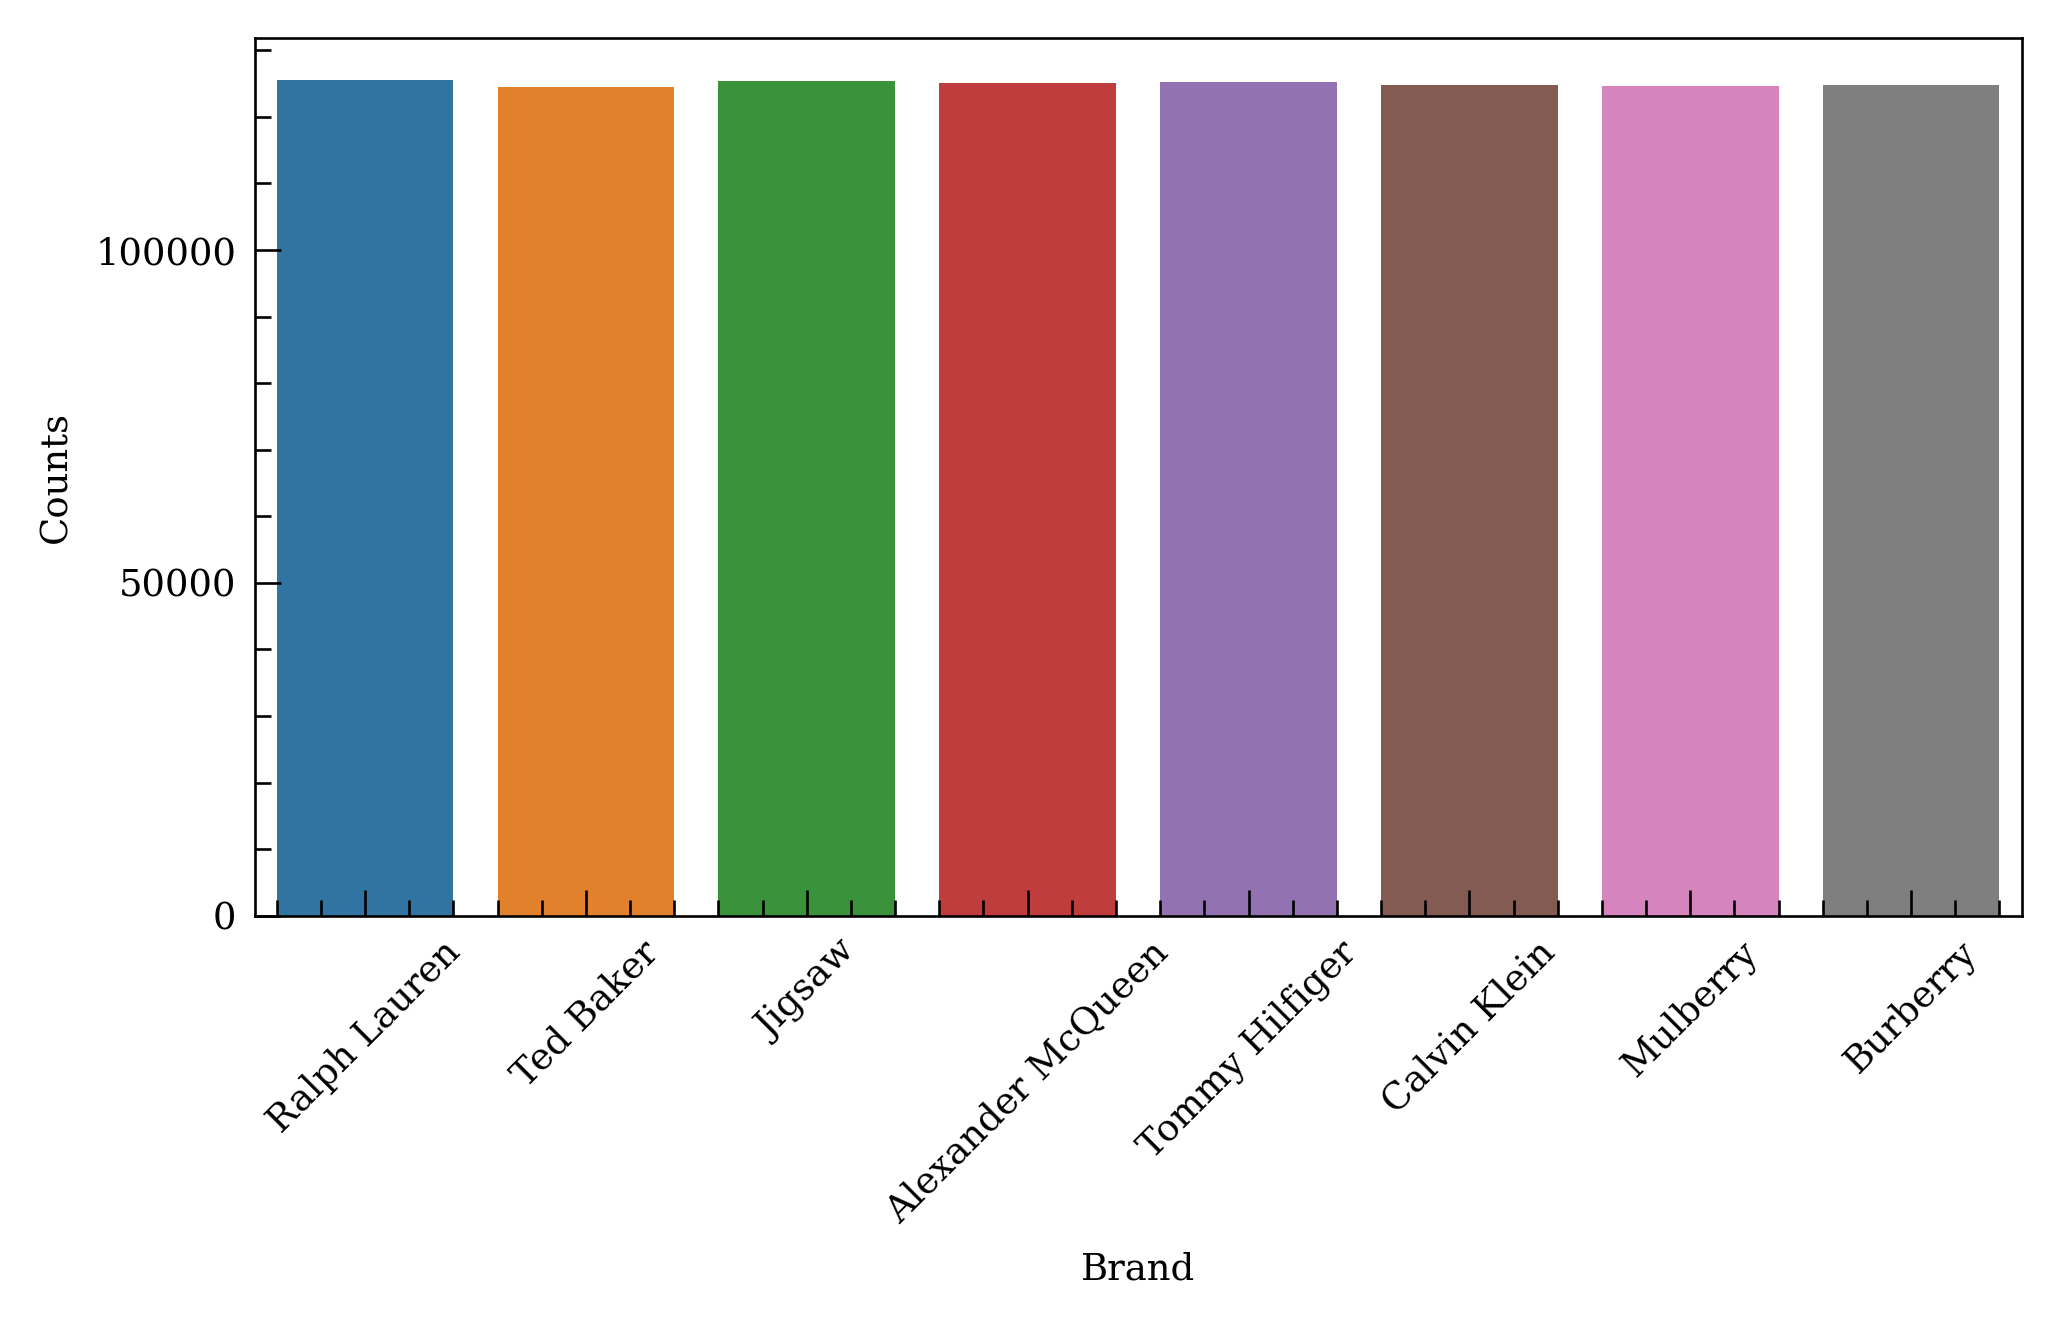

In [51]:
# Counterplot corresponding to Brand column
sns.countplot(x='Brand', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Brand', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

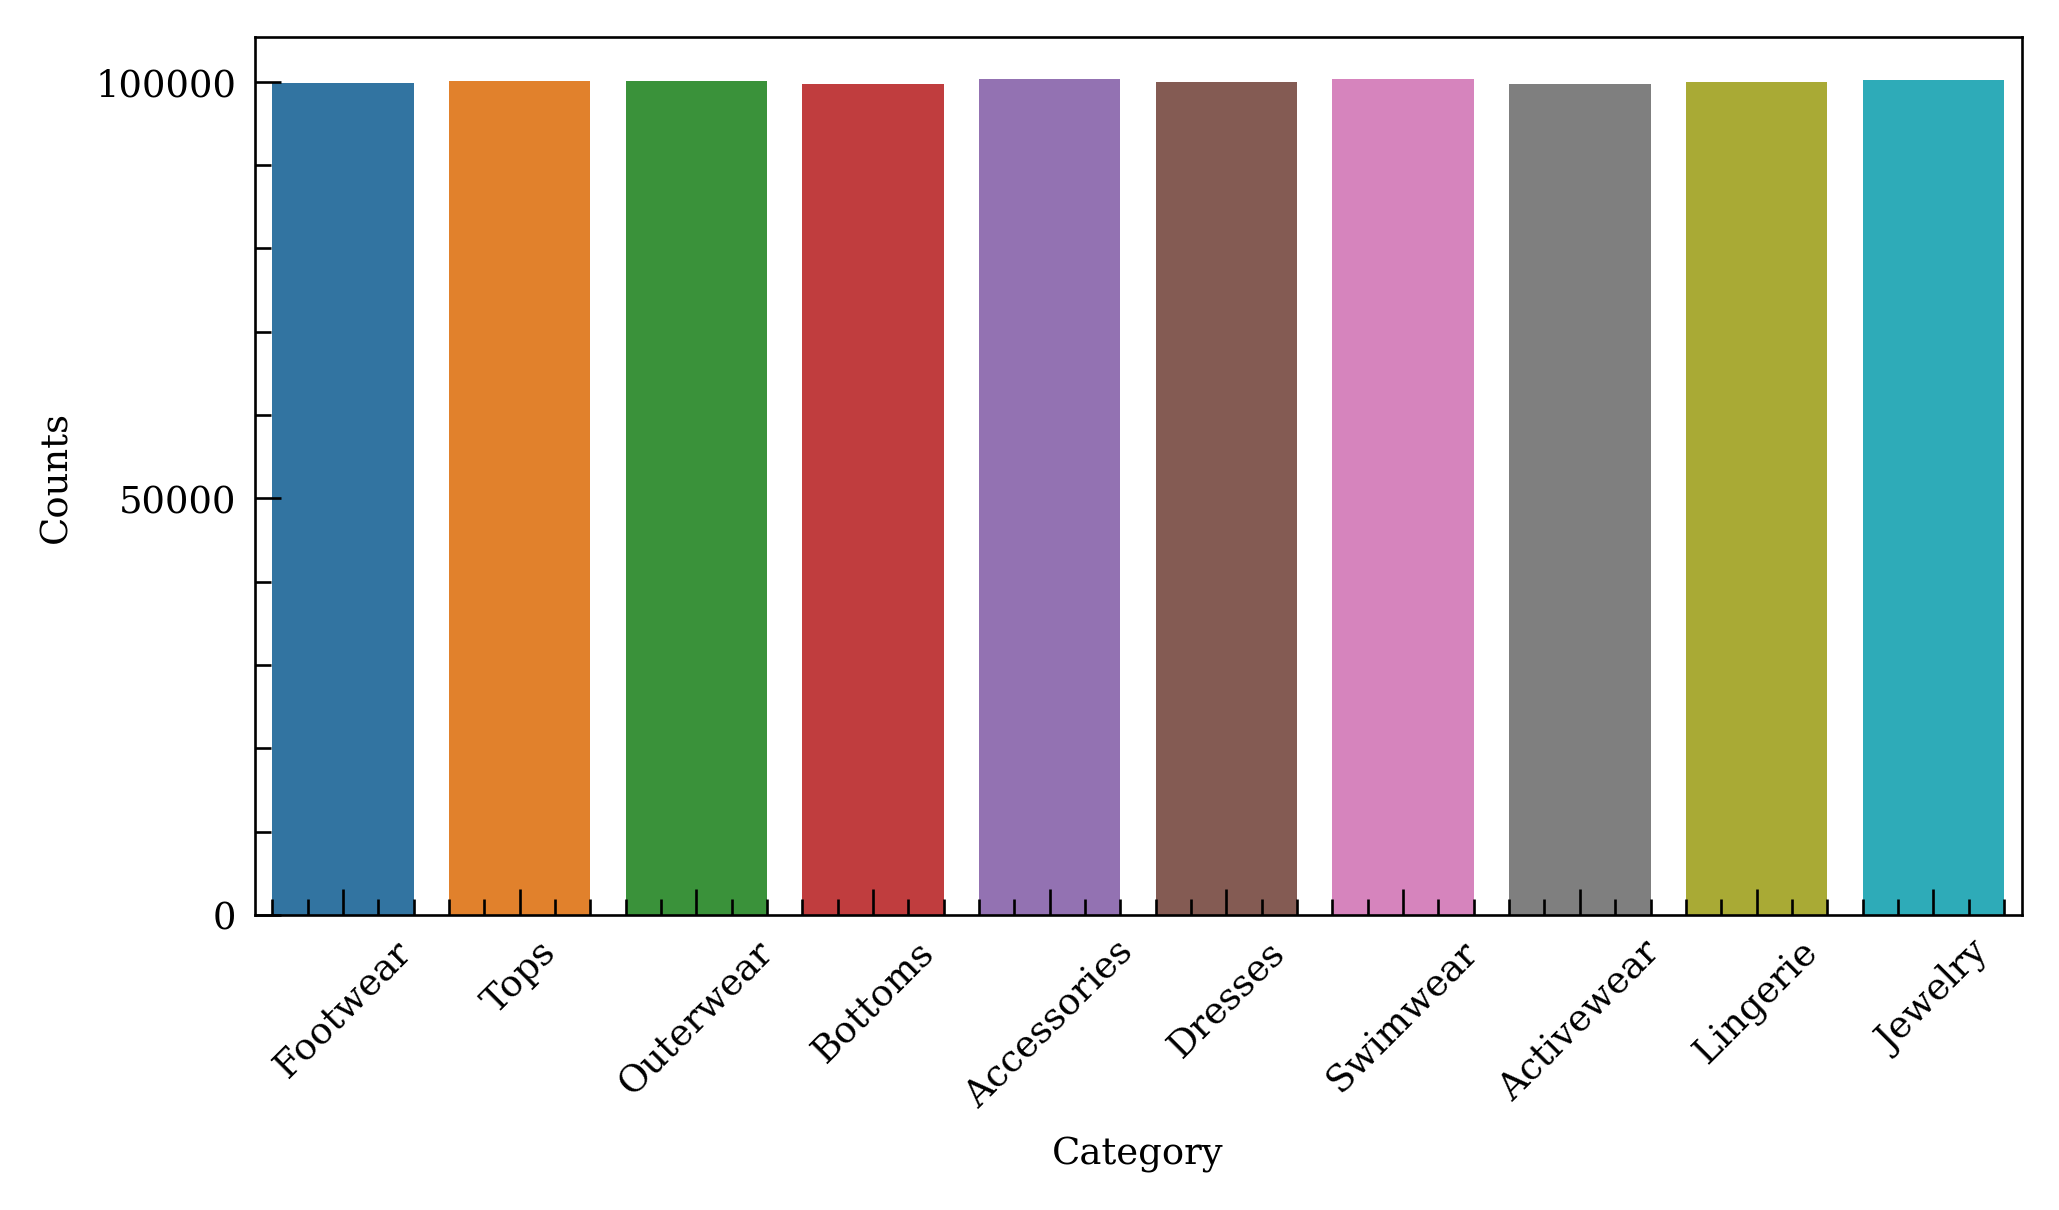

In [55]:
# Counterplot corresponding to Category column
sns.countplot(x='Category', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Category', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

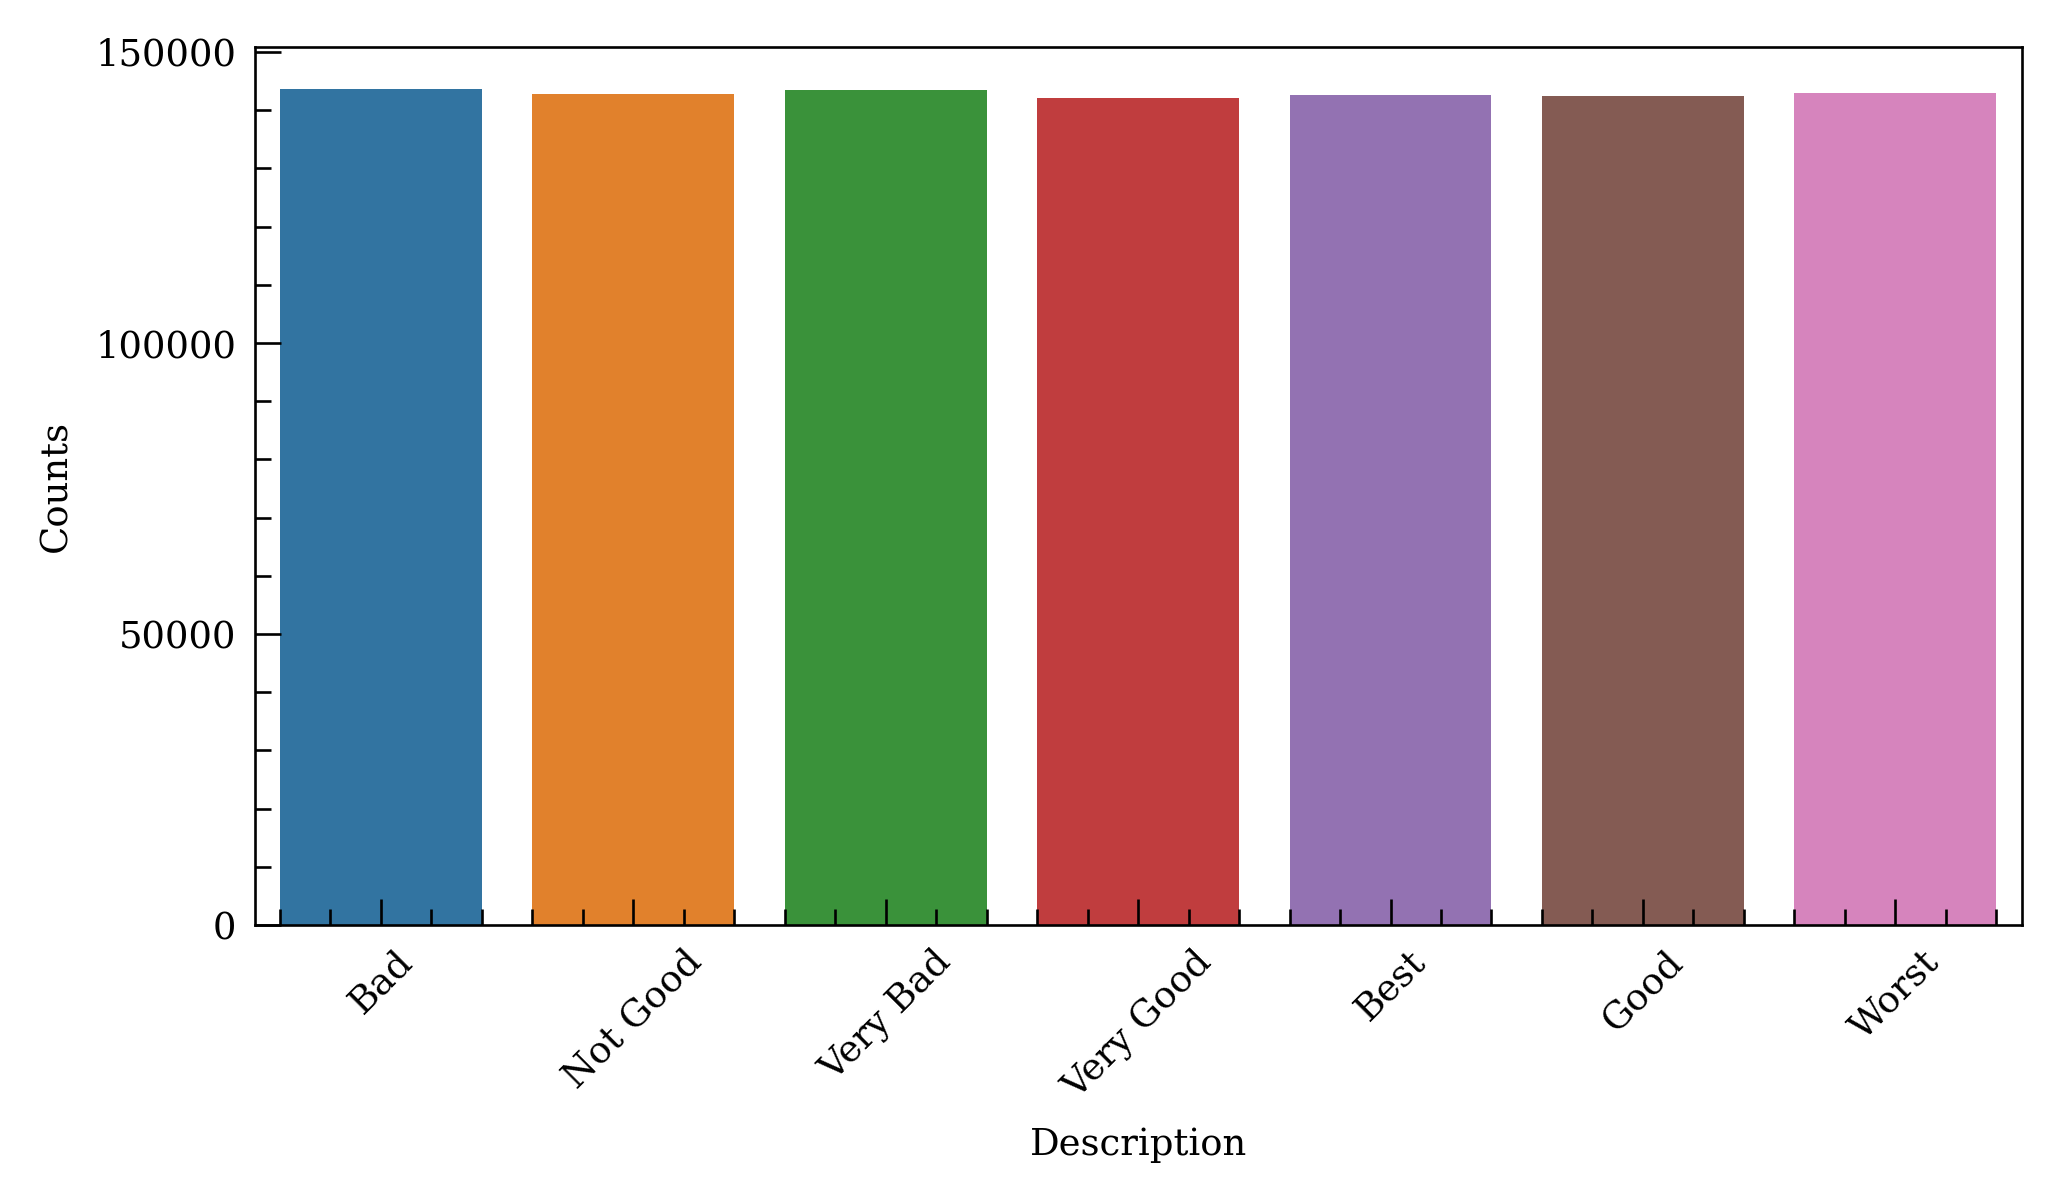

In [59]:
# Counterplot corresponding to Description column
sns.countplot(x='Description', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Description', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

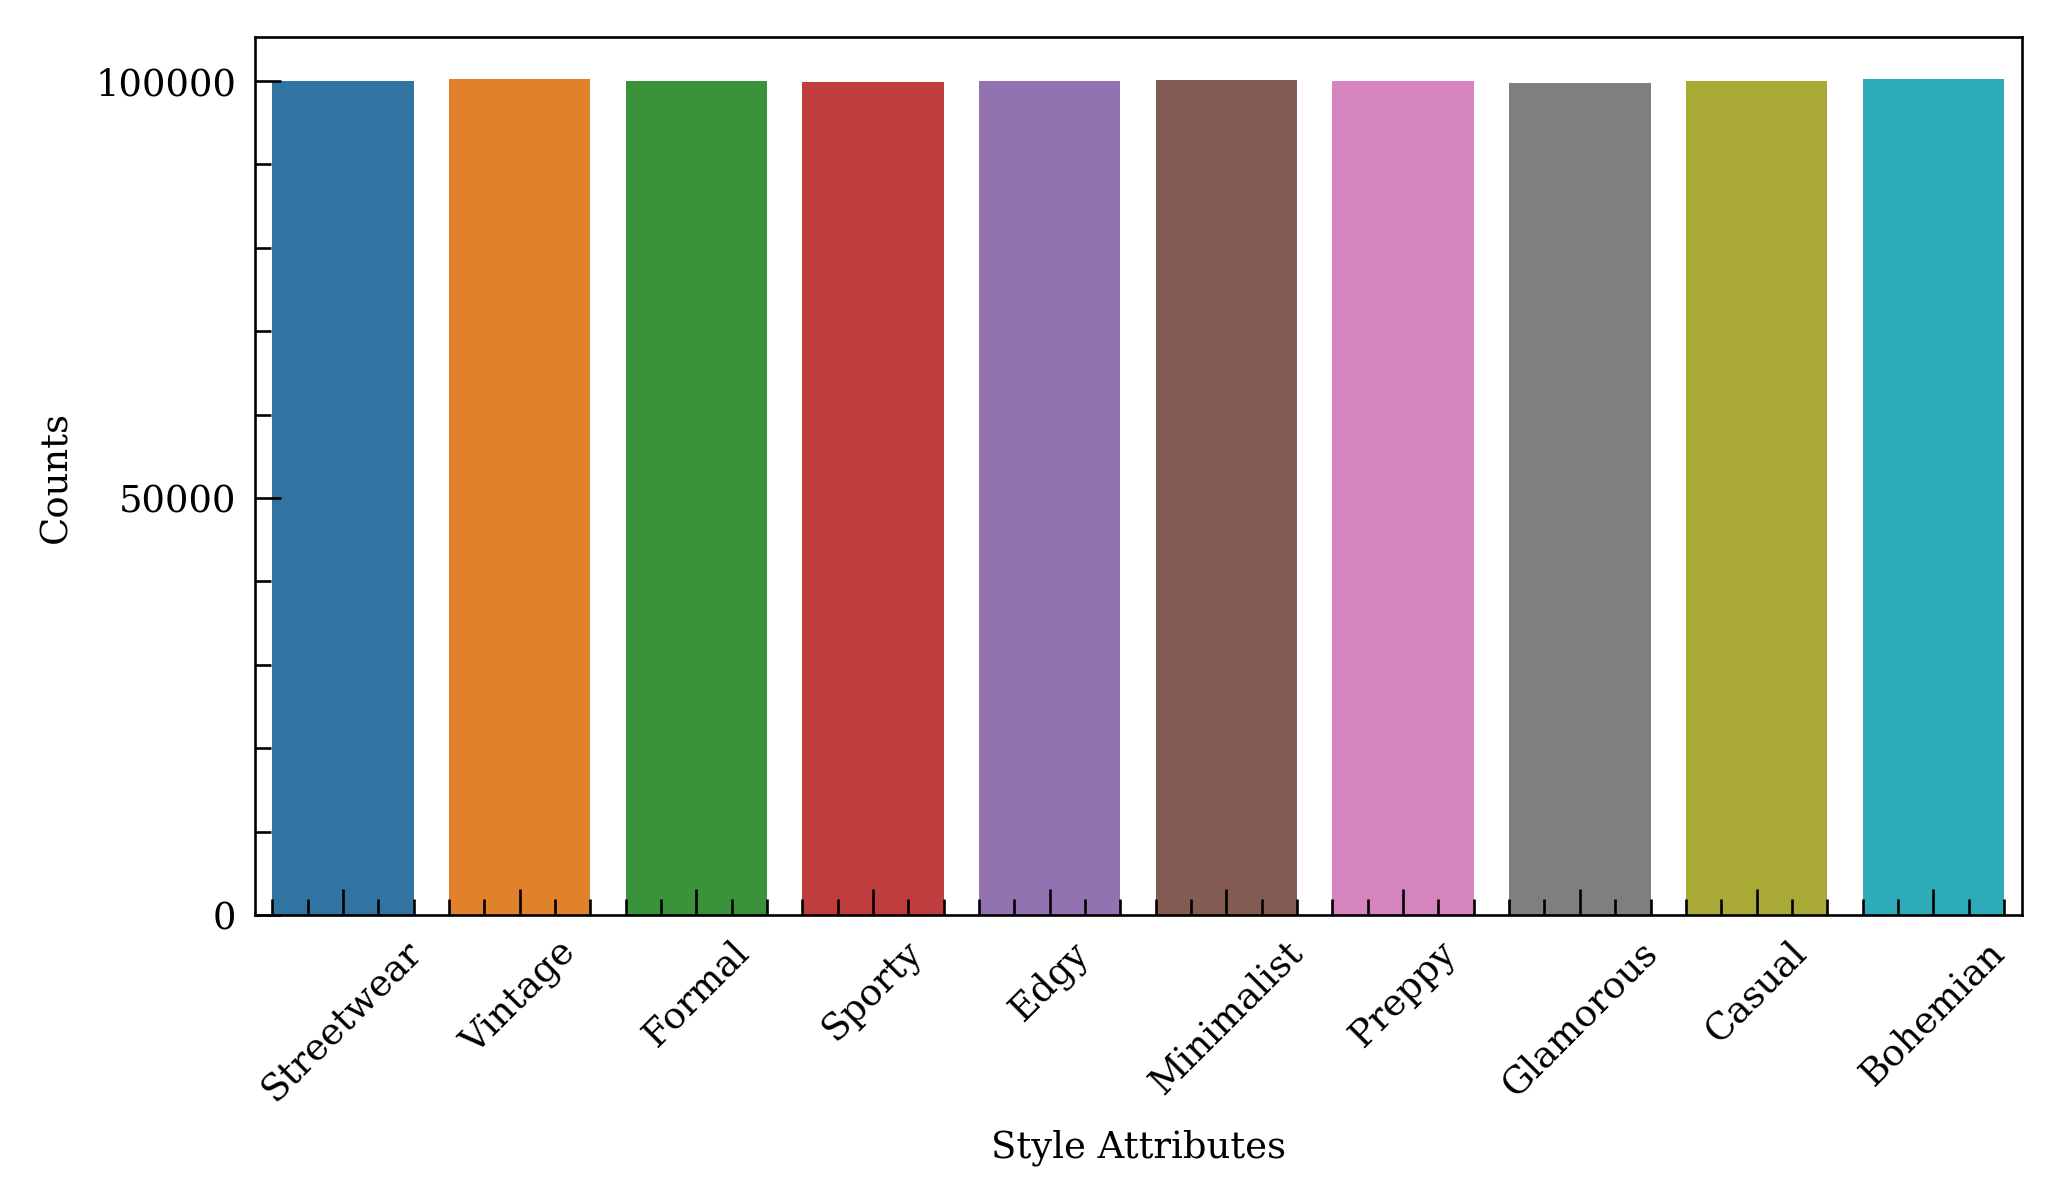

In [67]:
# Counterplot corresponding to Style Attributes column
sns.countplot(x='Style Attributes', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Style Attributes', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

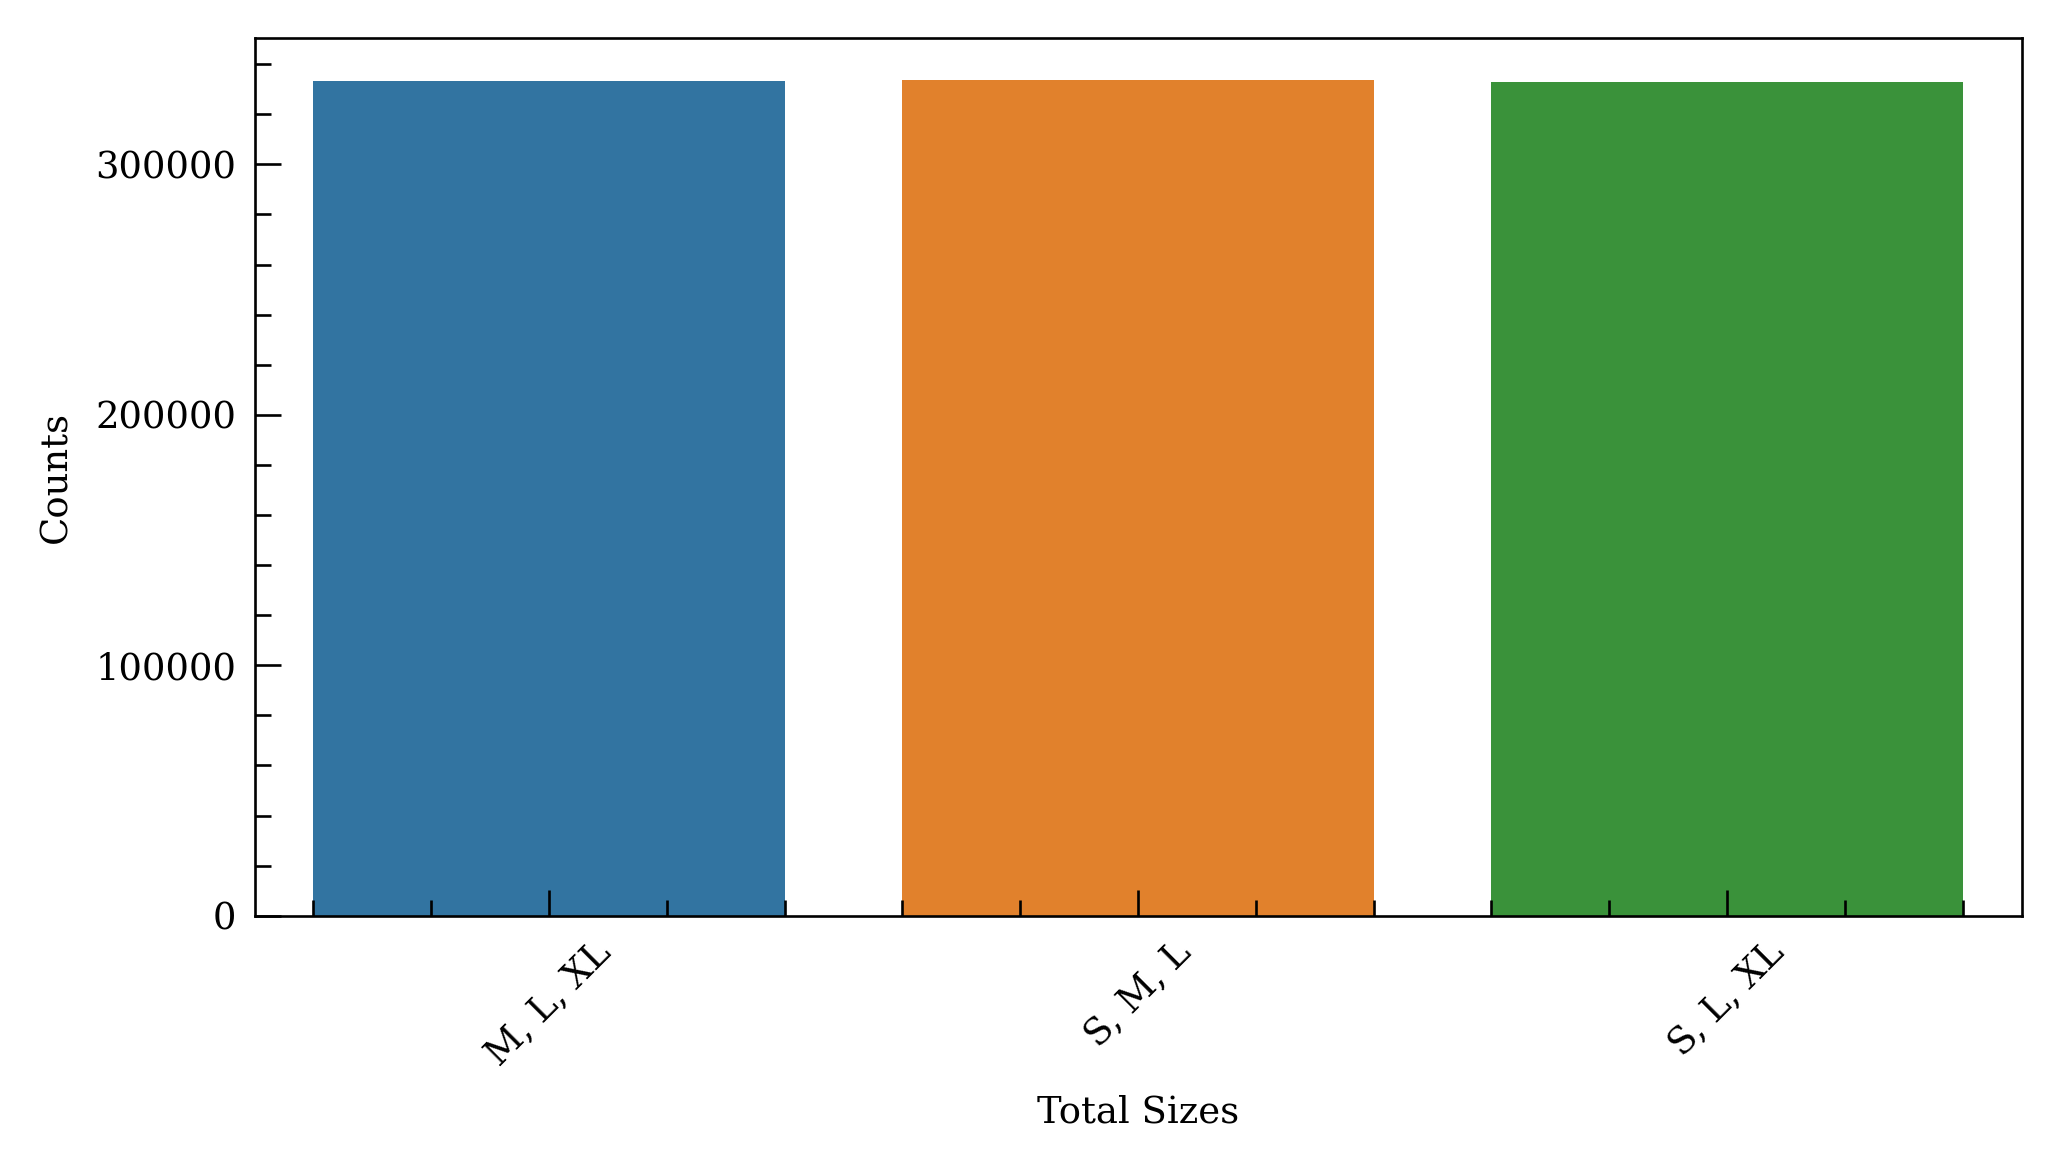

In [71]:
# Counterplot corresponding to Total Sizes column
sns.countplot(x='Total Sizes', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Total Sizes', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

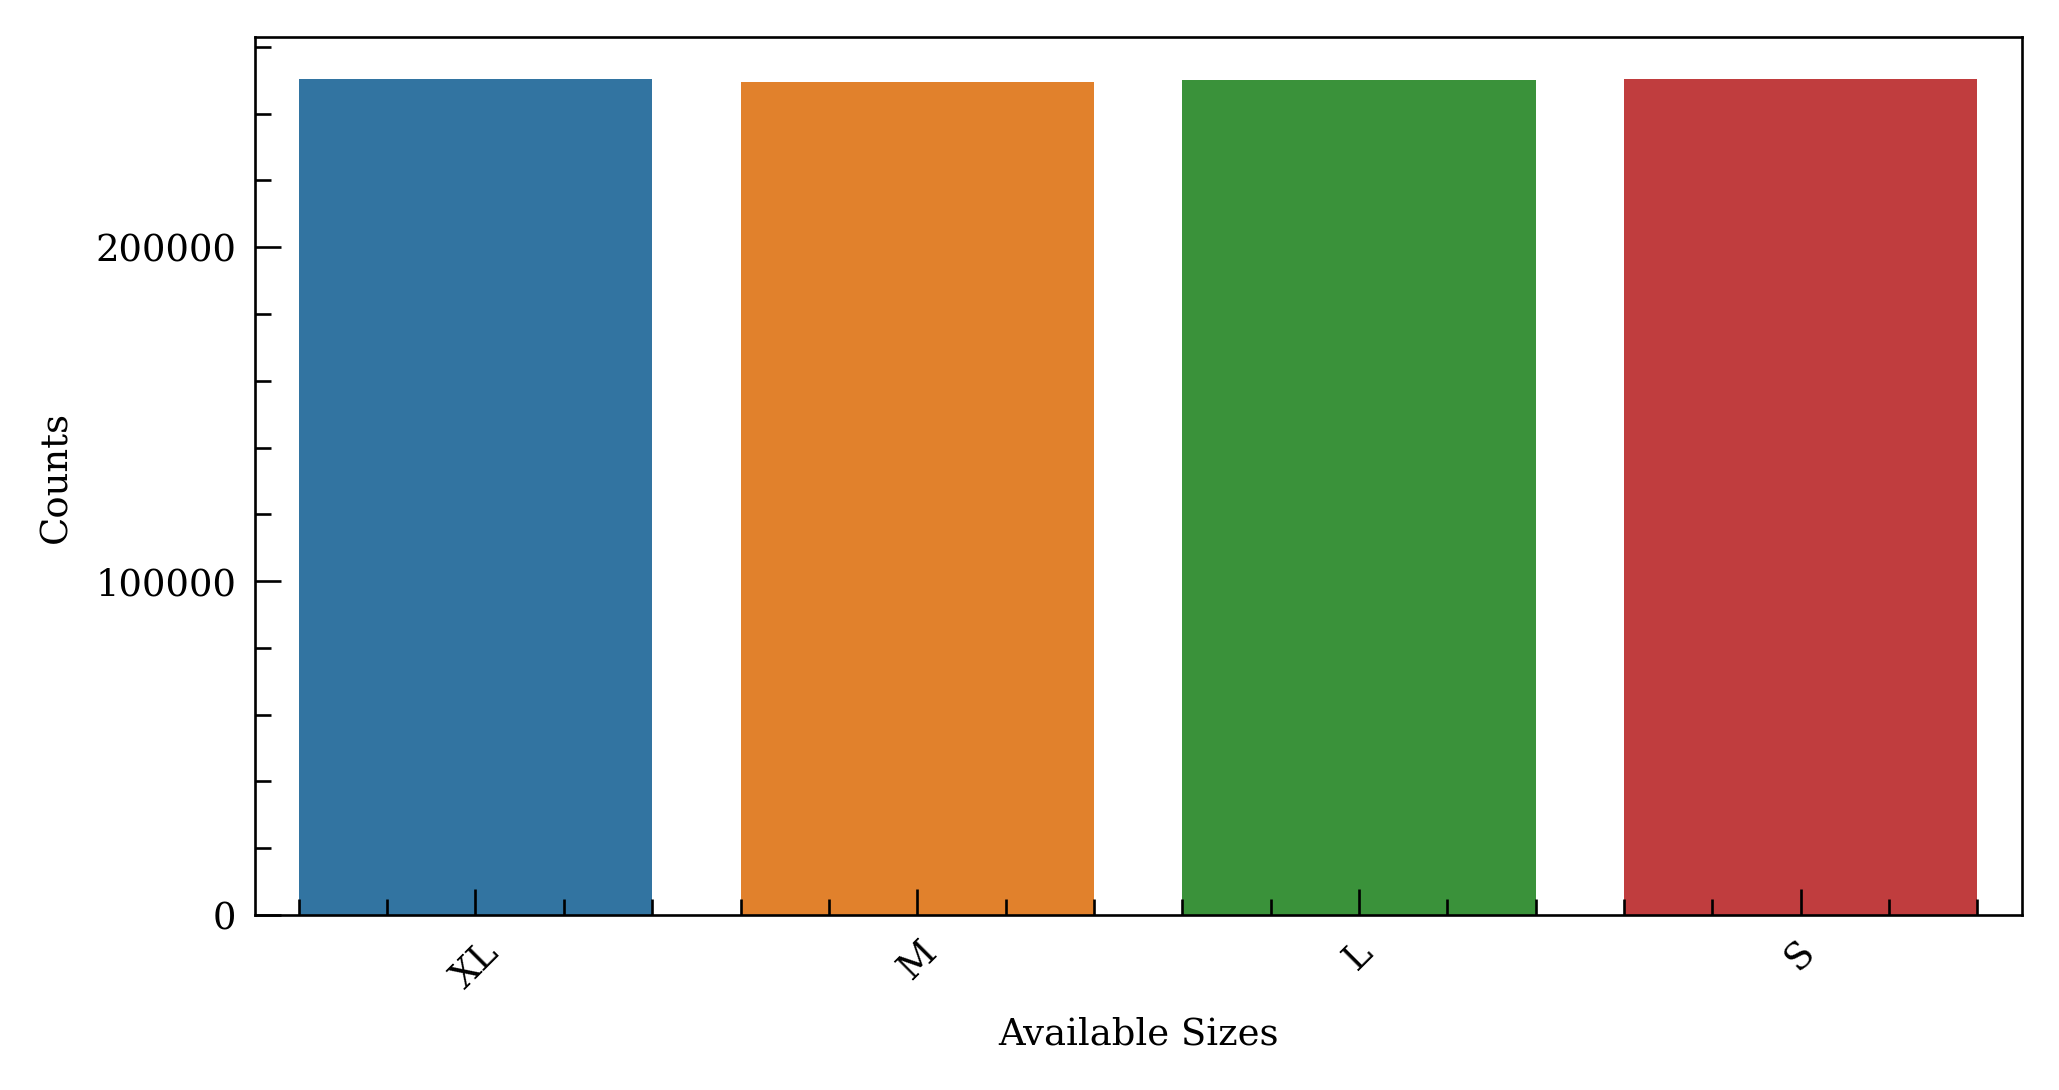

In [75]:
# Counterplot corresponding to Available Sizes column
sns.countplot(x='Available Sizes', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Available Sizes', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

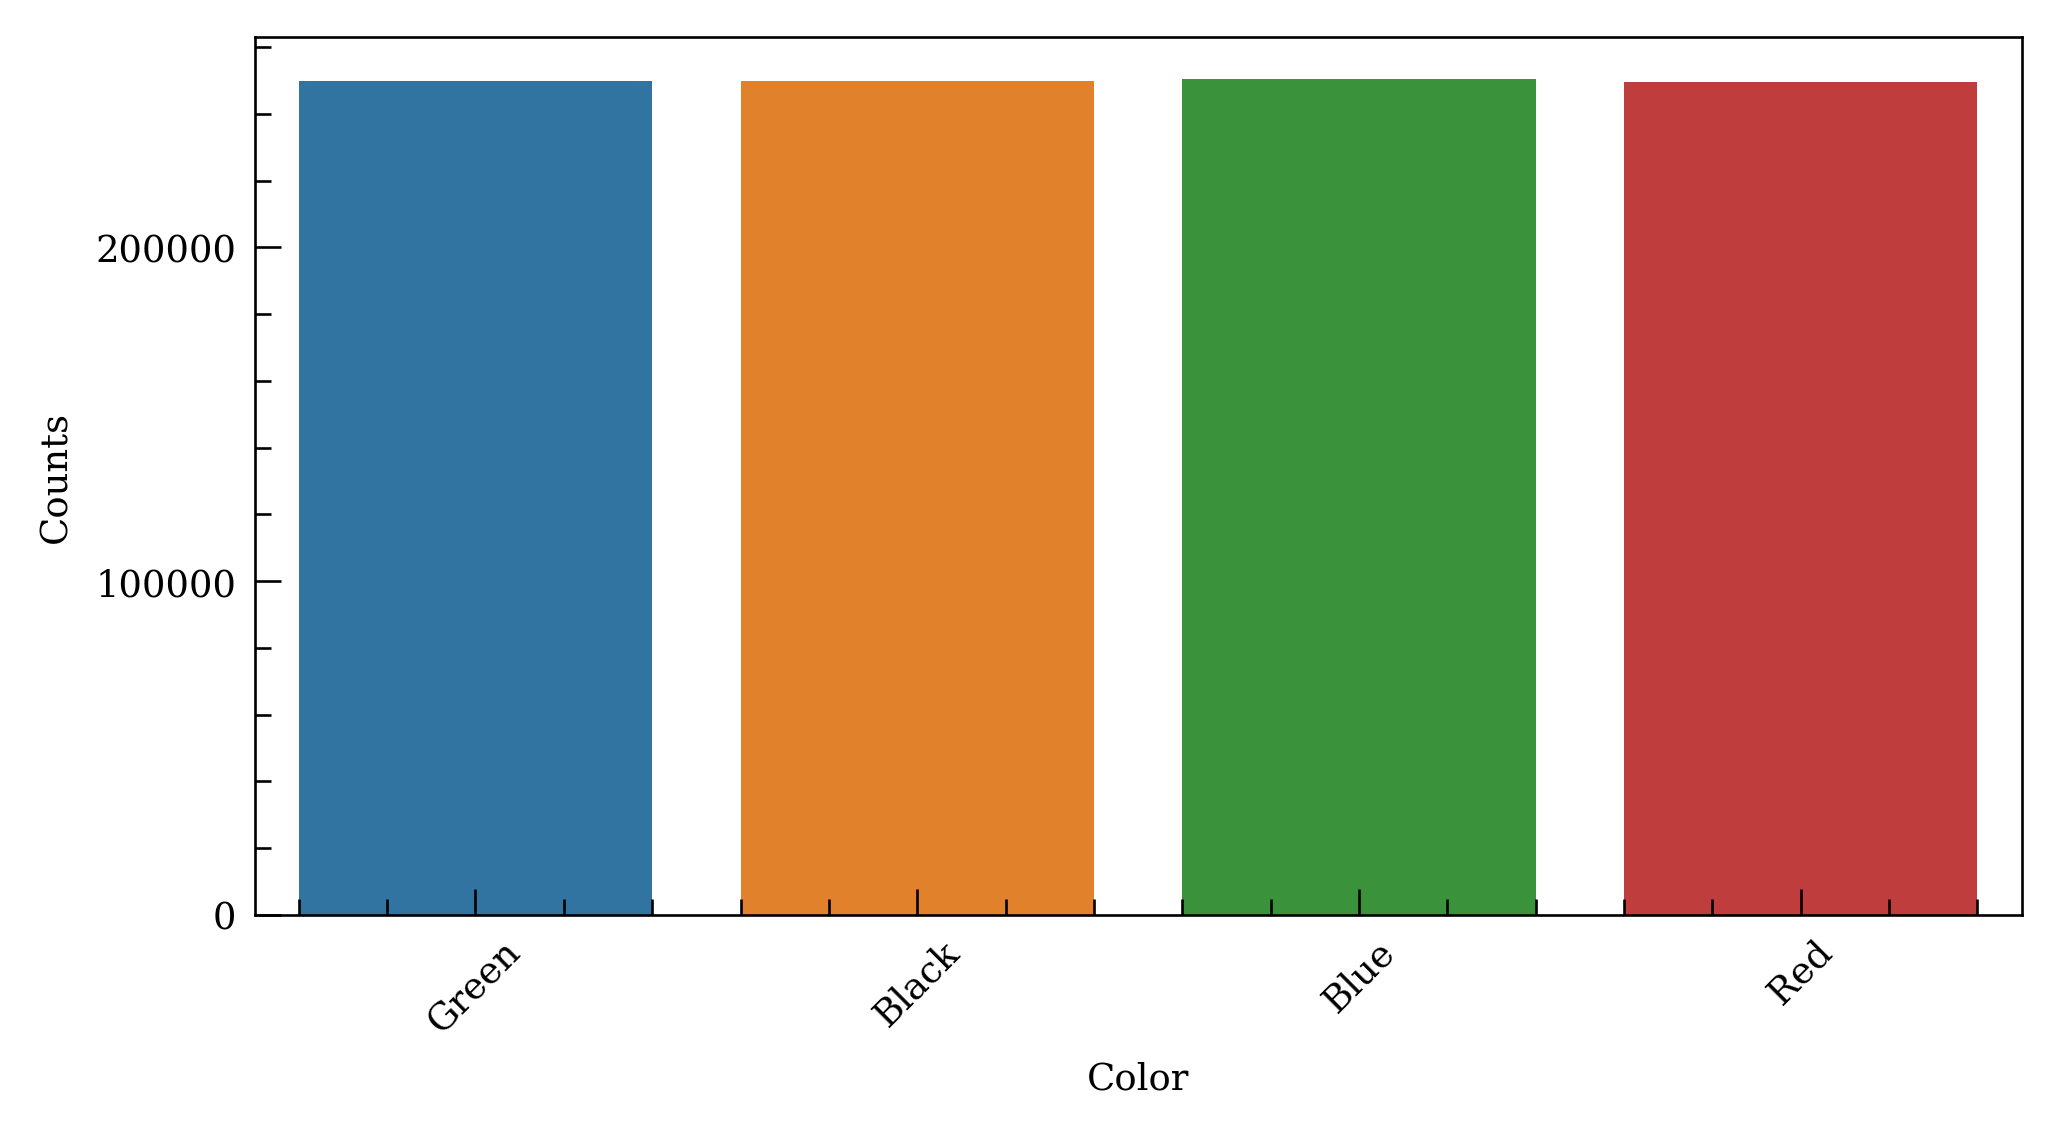

In [79]:
# Counterplot corresponding to Color column
sns.countplot(x='Color', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Color', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

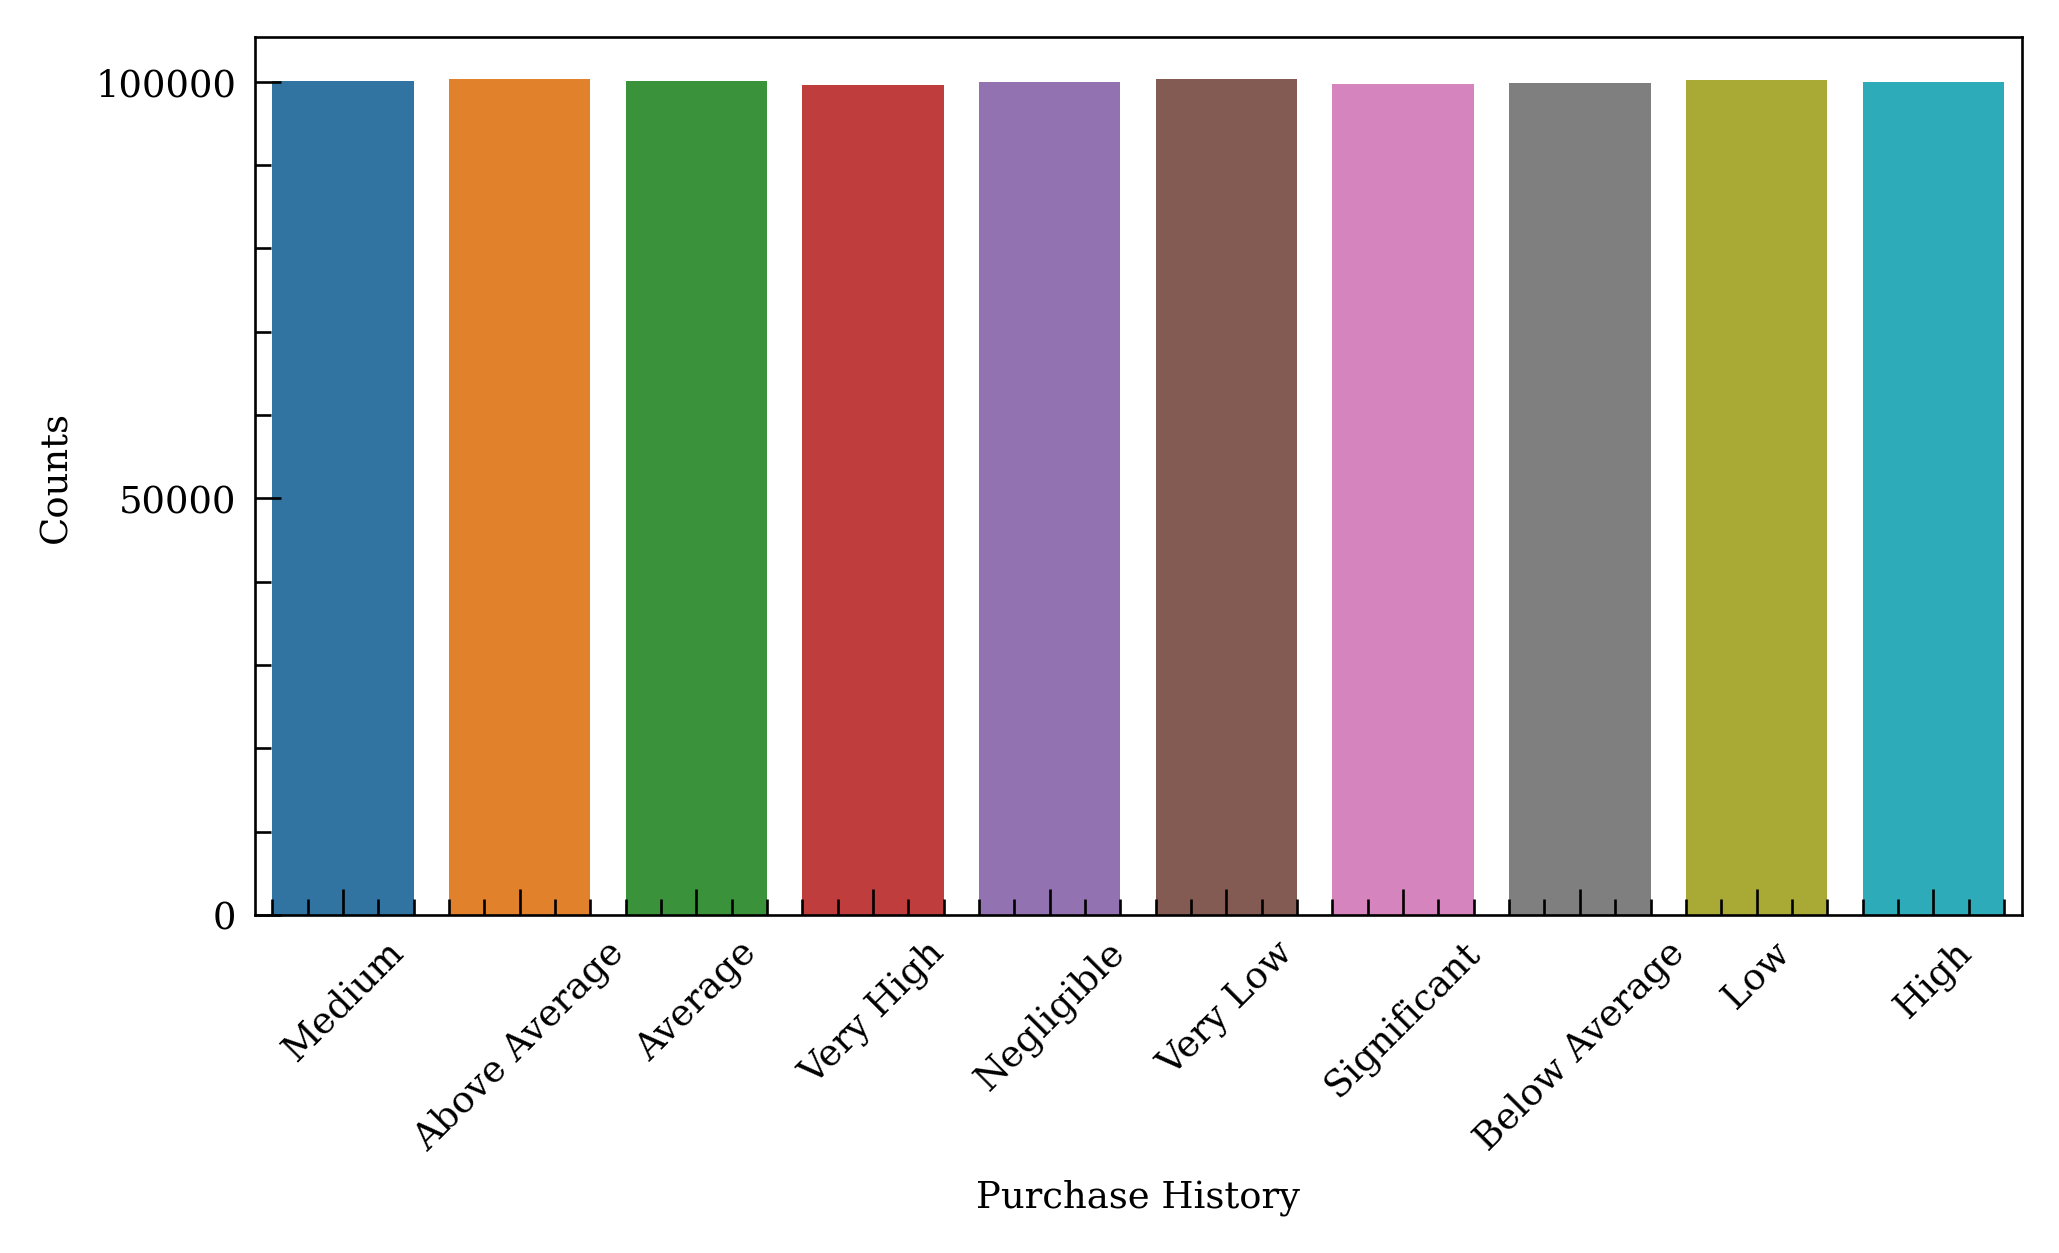

In [83]:
# Counterplot corresponding to Purchase History column
sns.countplot(x='Purchase History', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Purchase History', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

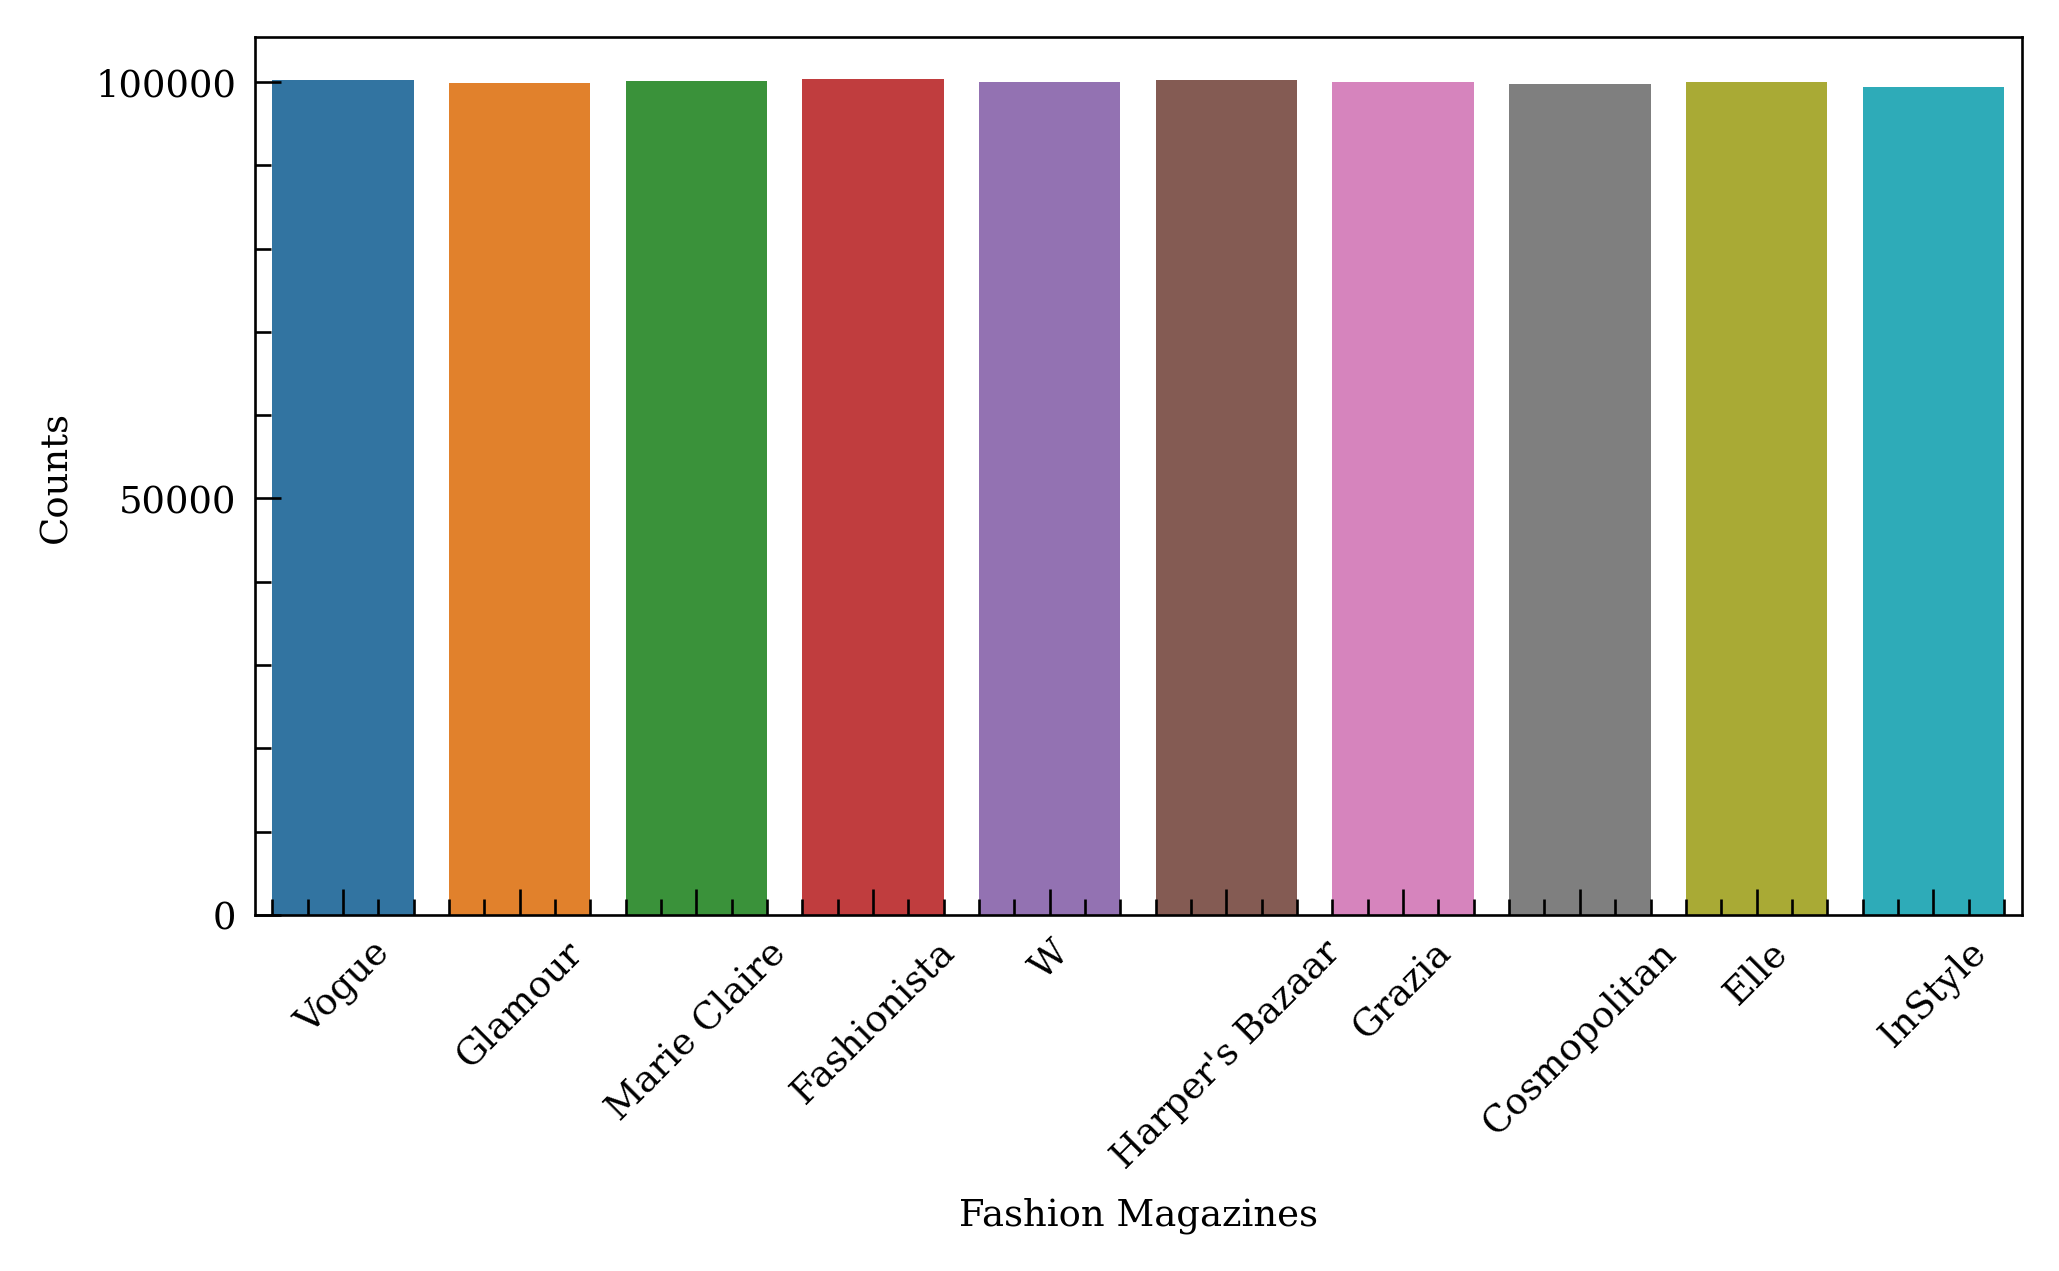

In [89]:
# Counterplot corresponding to Fashion Magazines column
sns.countplot(x='Fashion Magazines', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Fashion Magazines', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

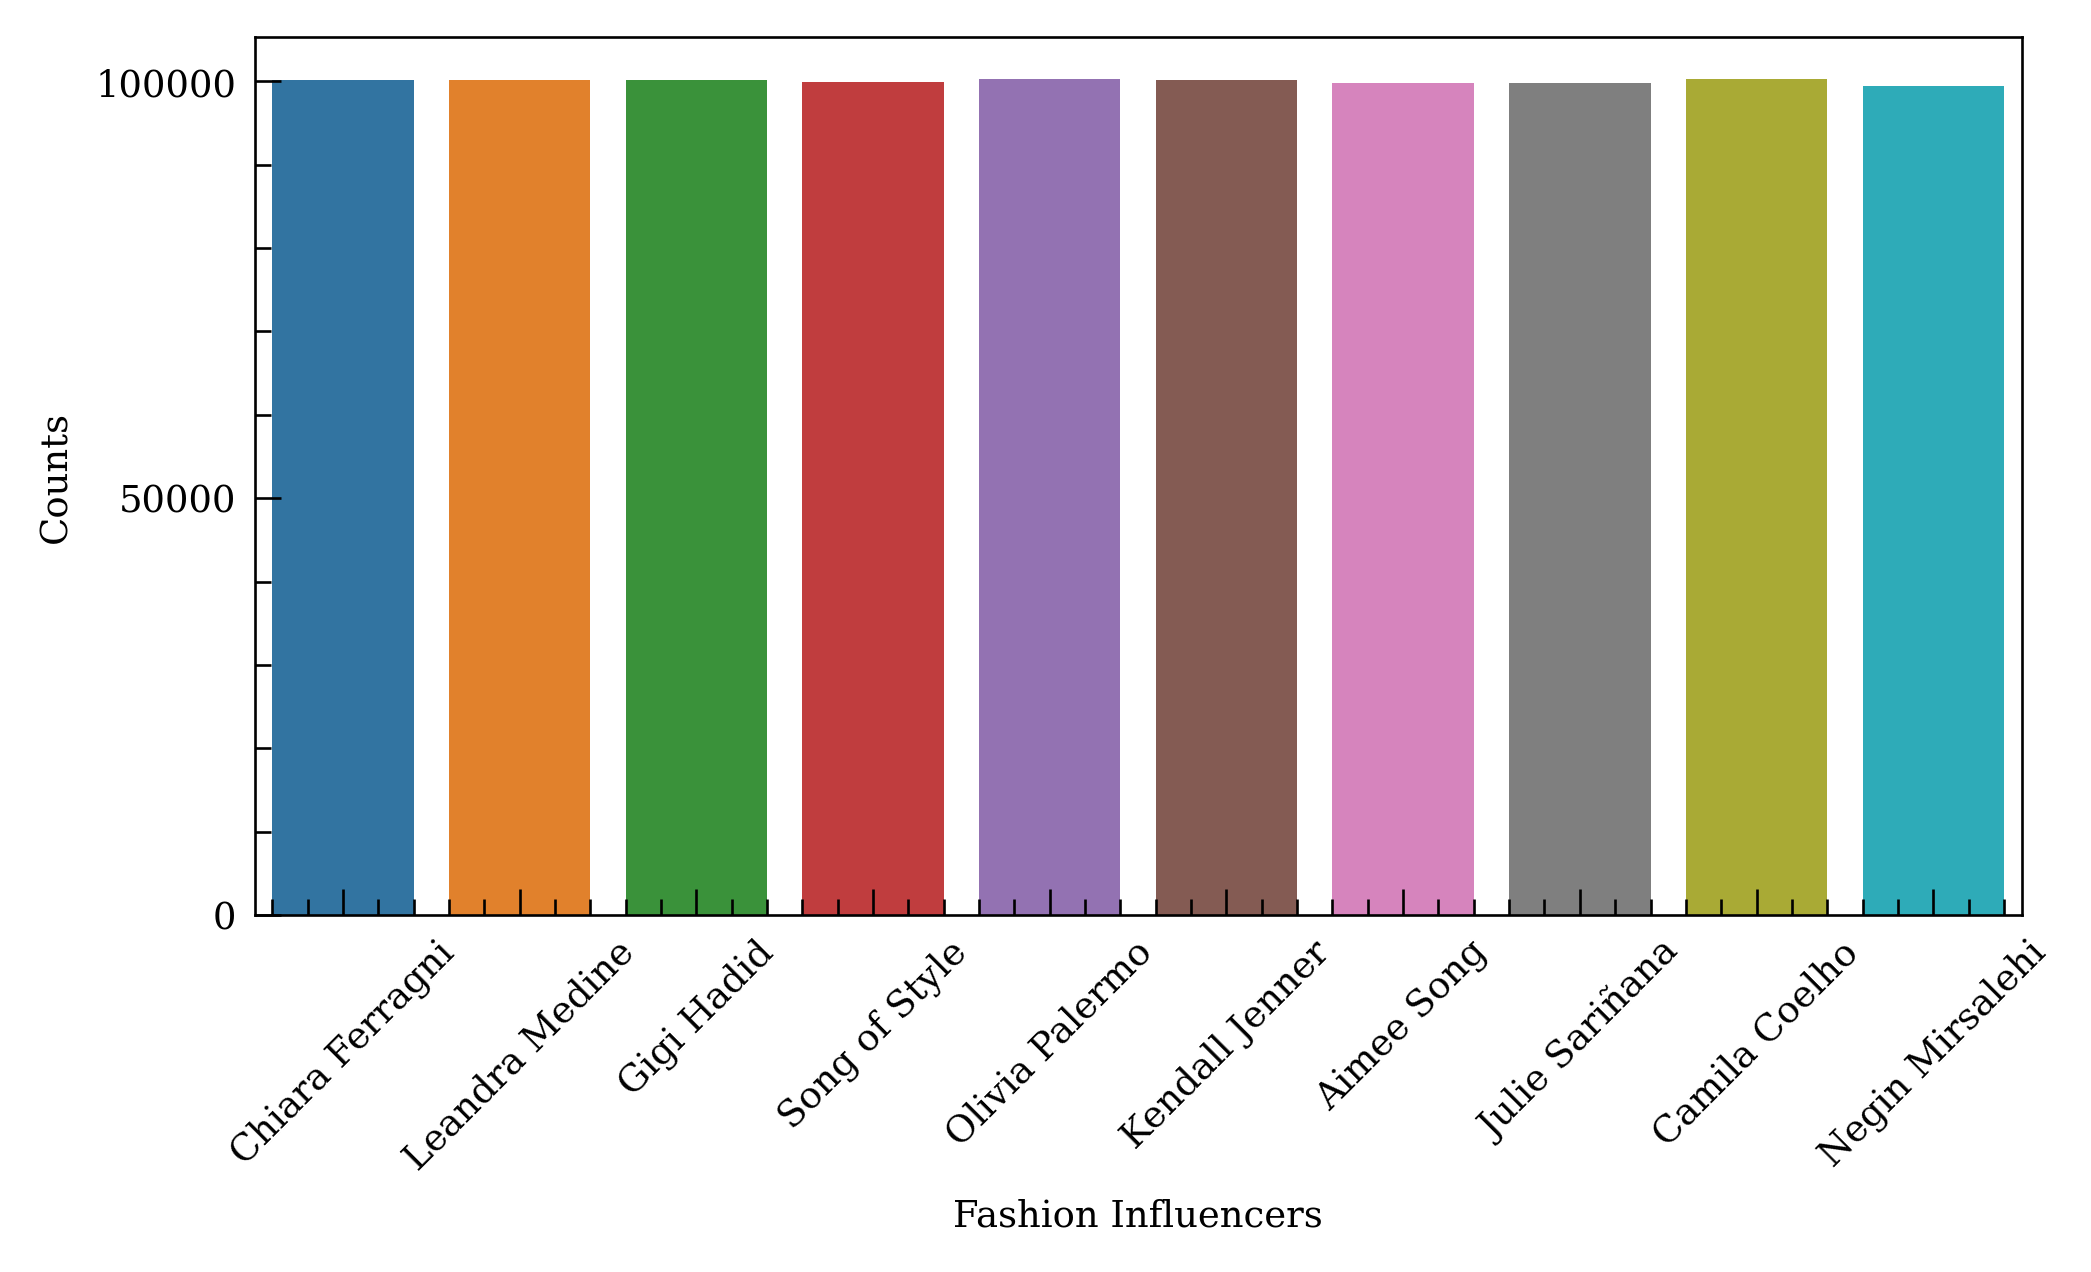

In [93]:
# Counterplot corresponding to Fashion Influencers column
sns.countplot(x='Fashion Influencers', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Fashion Influencers', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

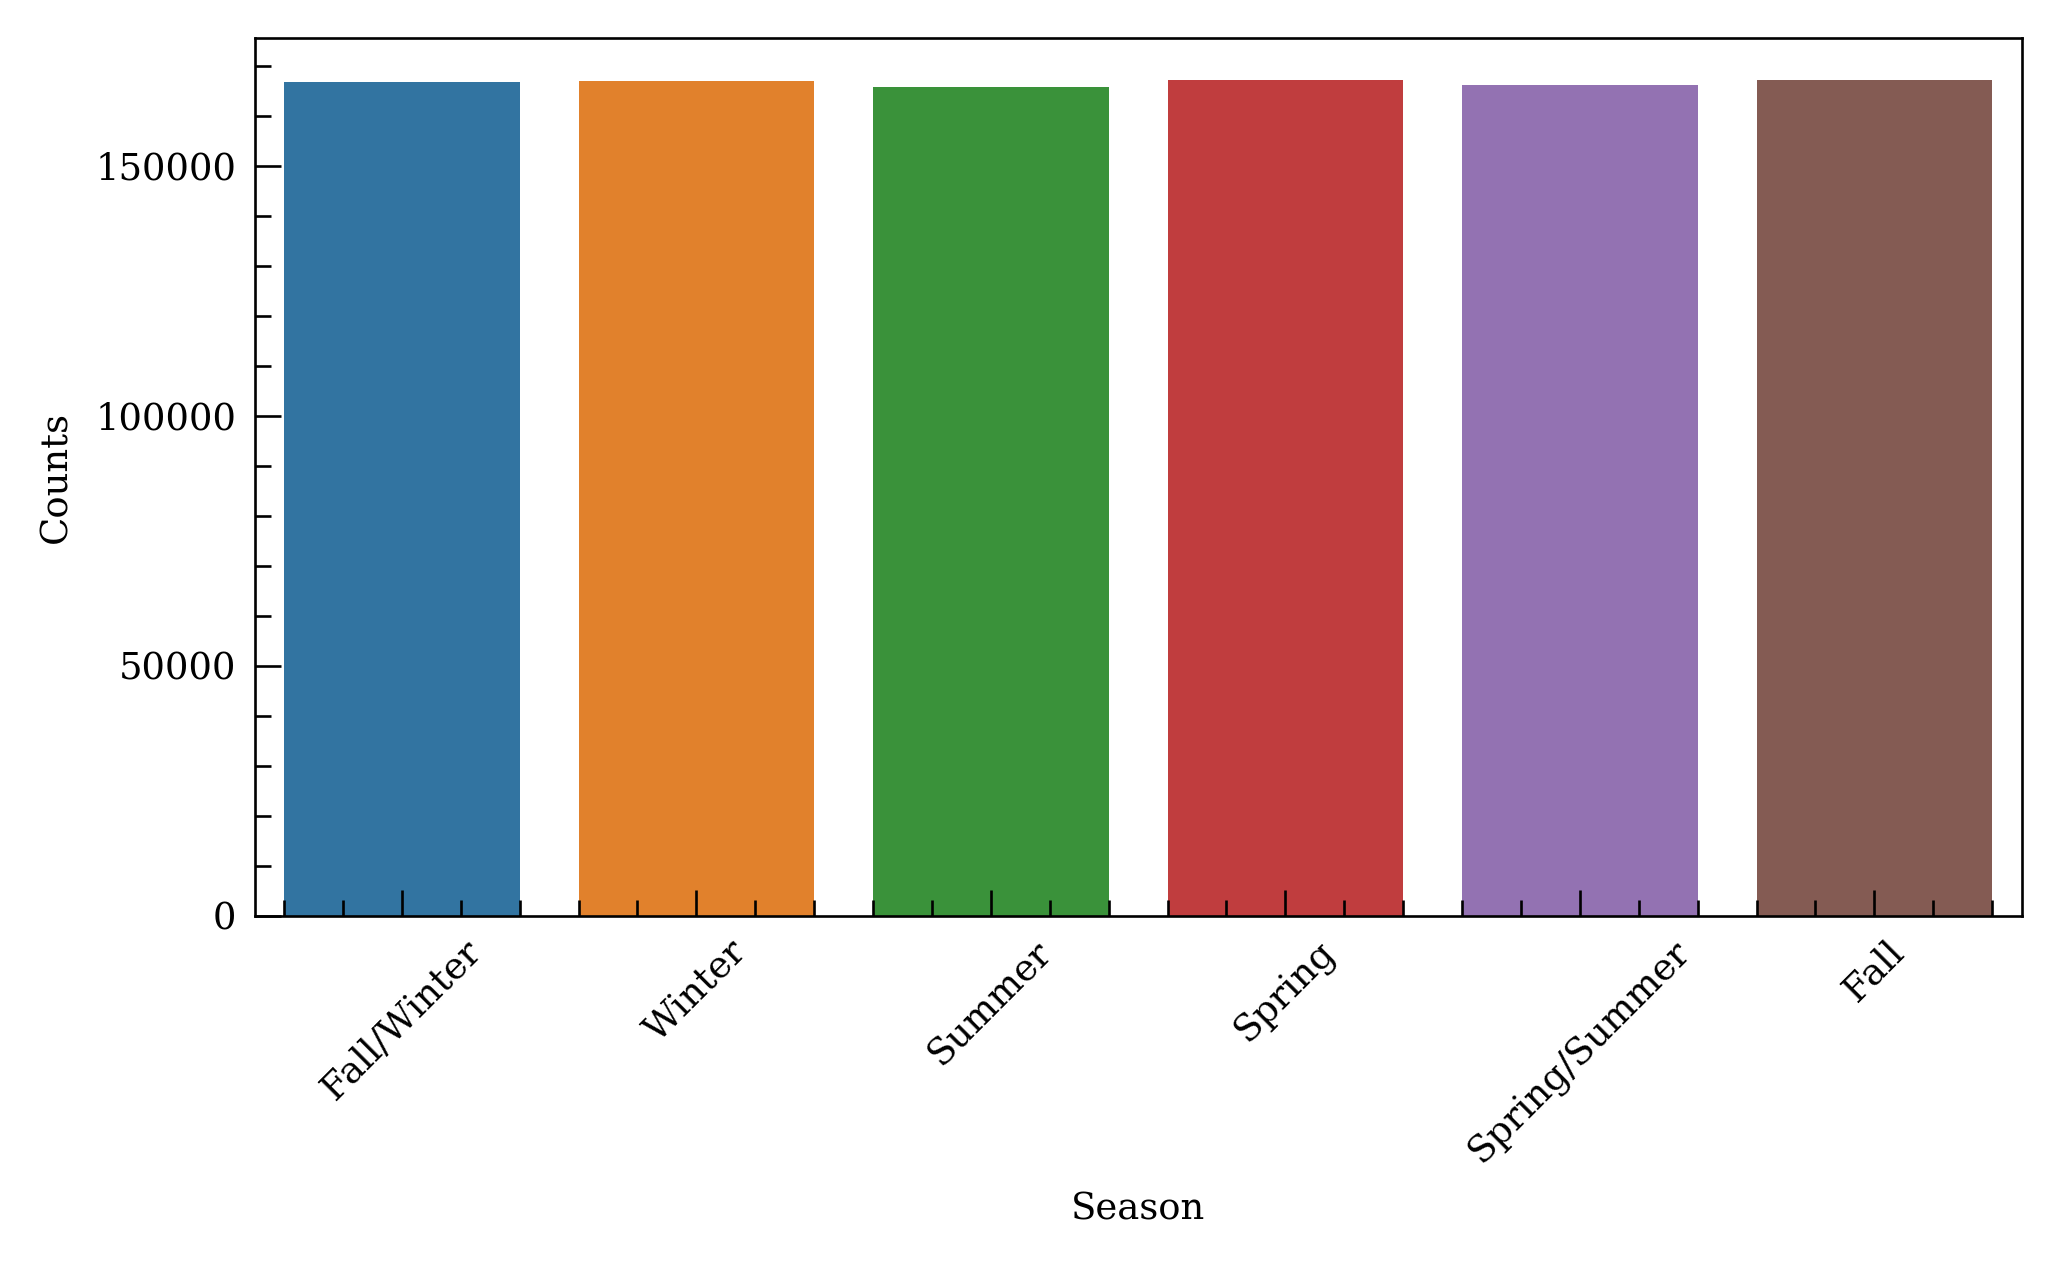

In [97]:
# Counterplot corresponding to Season column
sns.countplot(x='Season', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Season', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

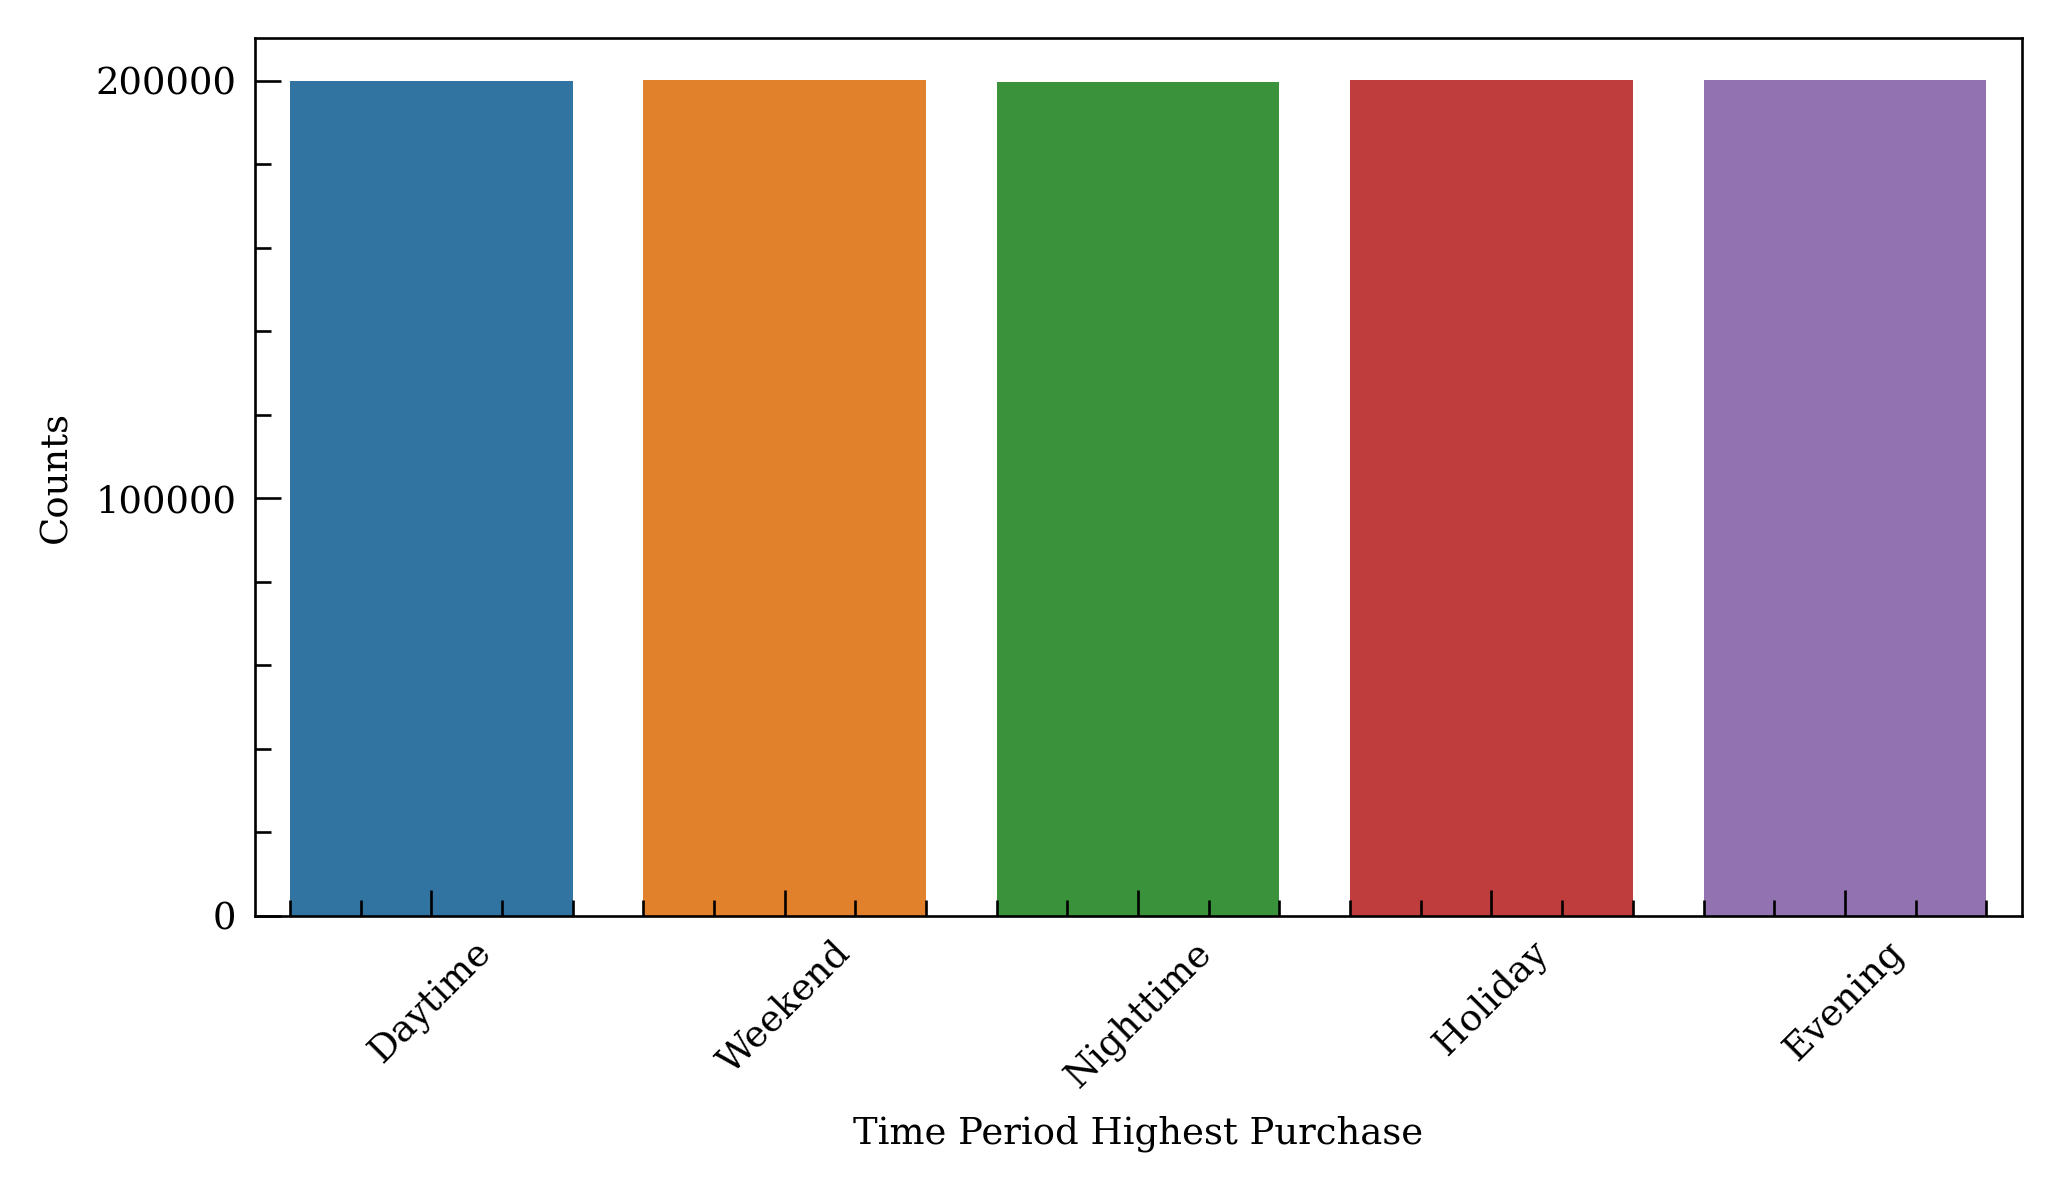

In [101]:
# Counterplot corresponding to Time Period Highest Purchase column
sns.countplot(x='Time Period Highest Purchase', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Time Period Highest Purchase', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

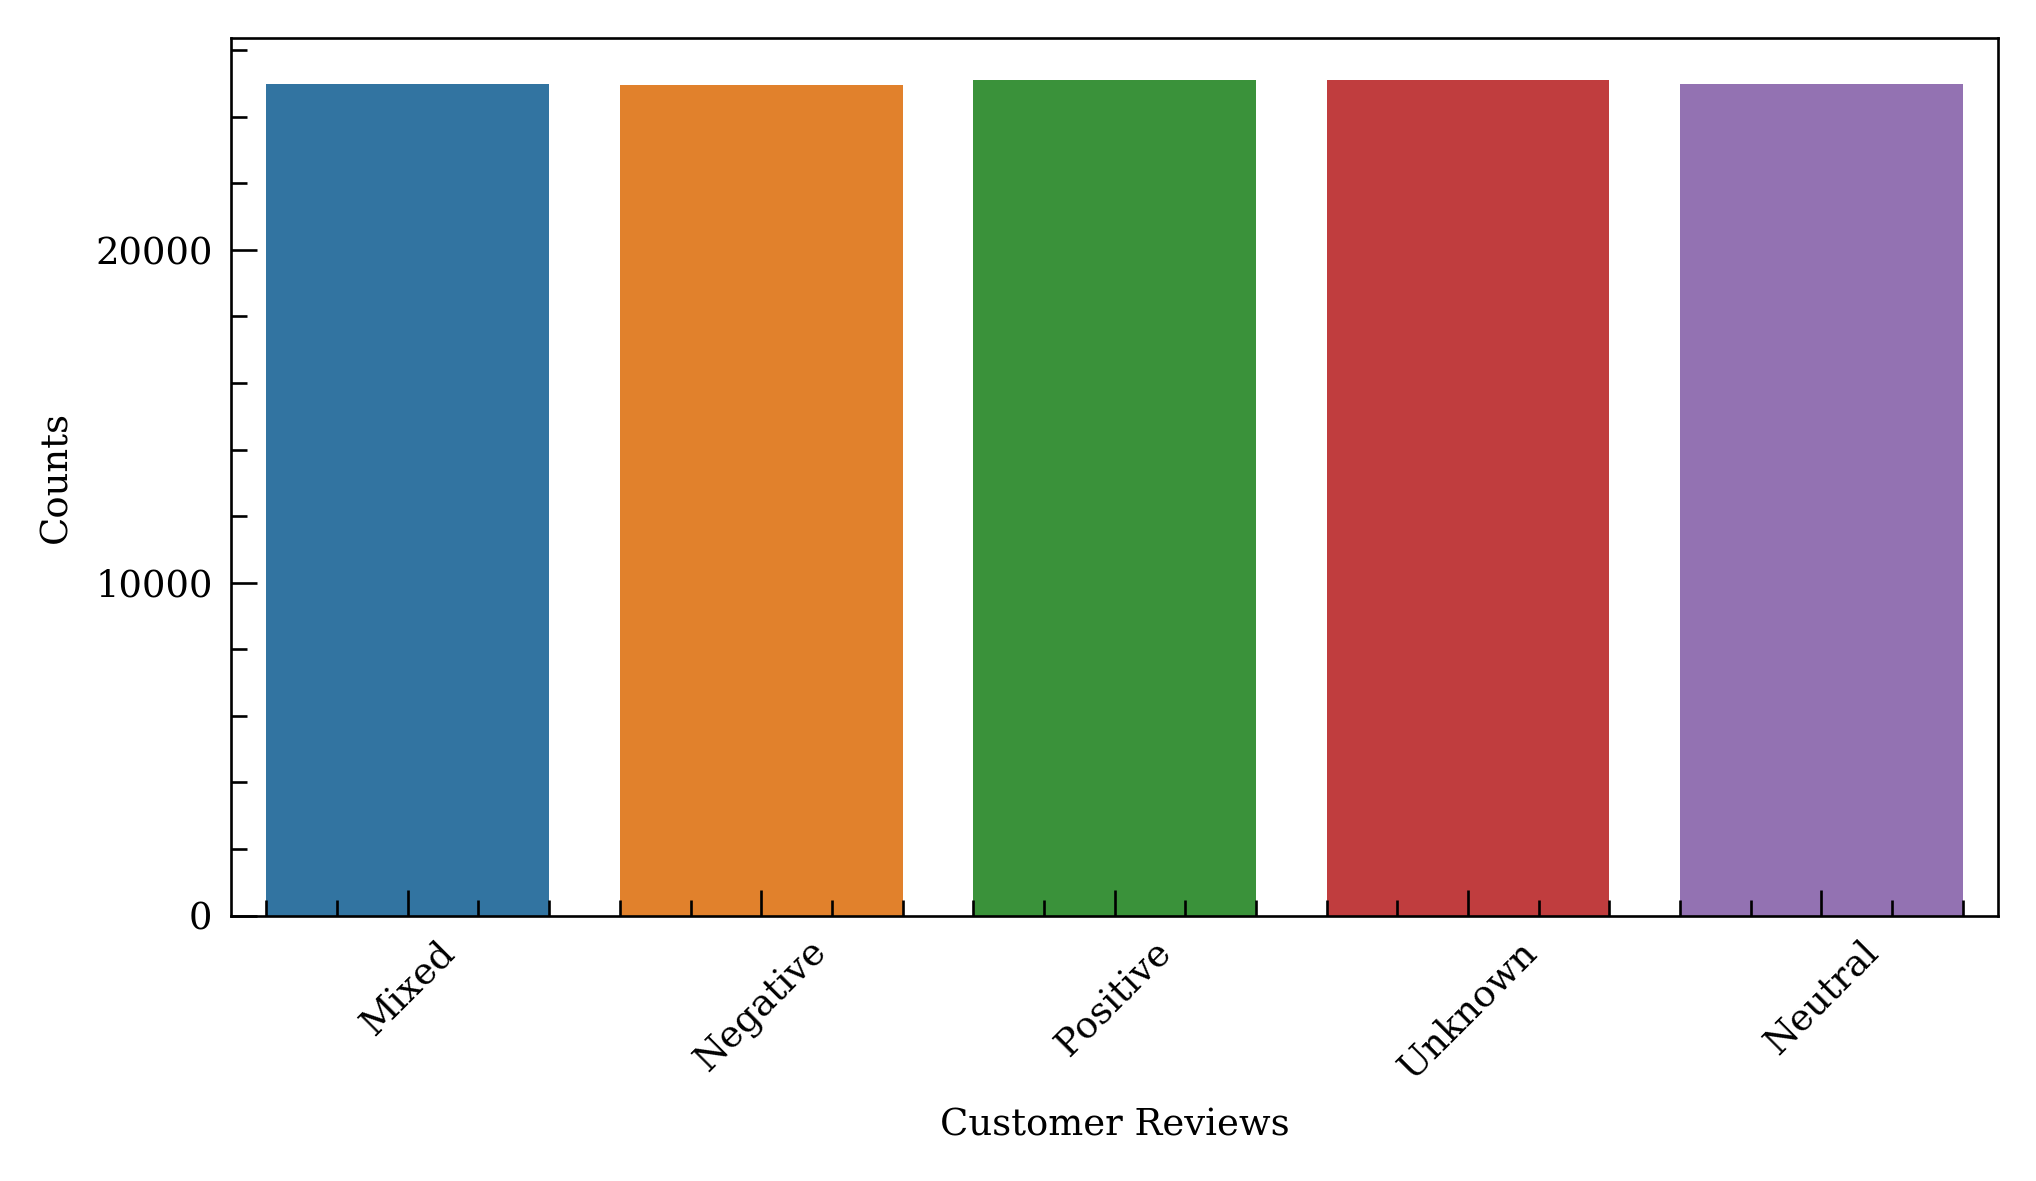

In [104]:
# Counterplot corresponding to Customer Reviews column
sns.countplot(x='Customer Reviews', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Customer Reviews', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

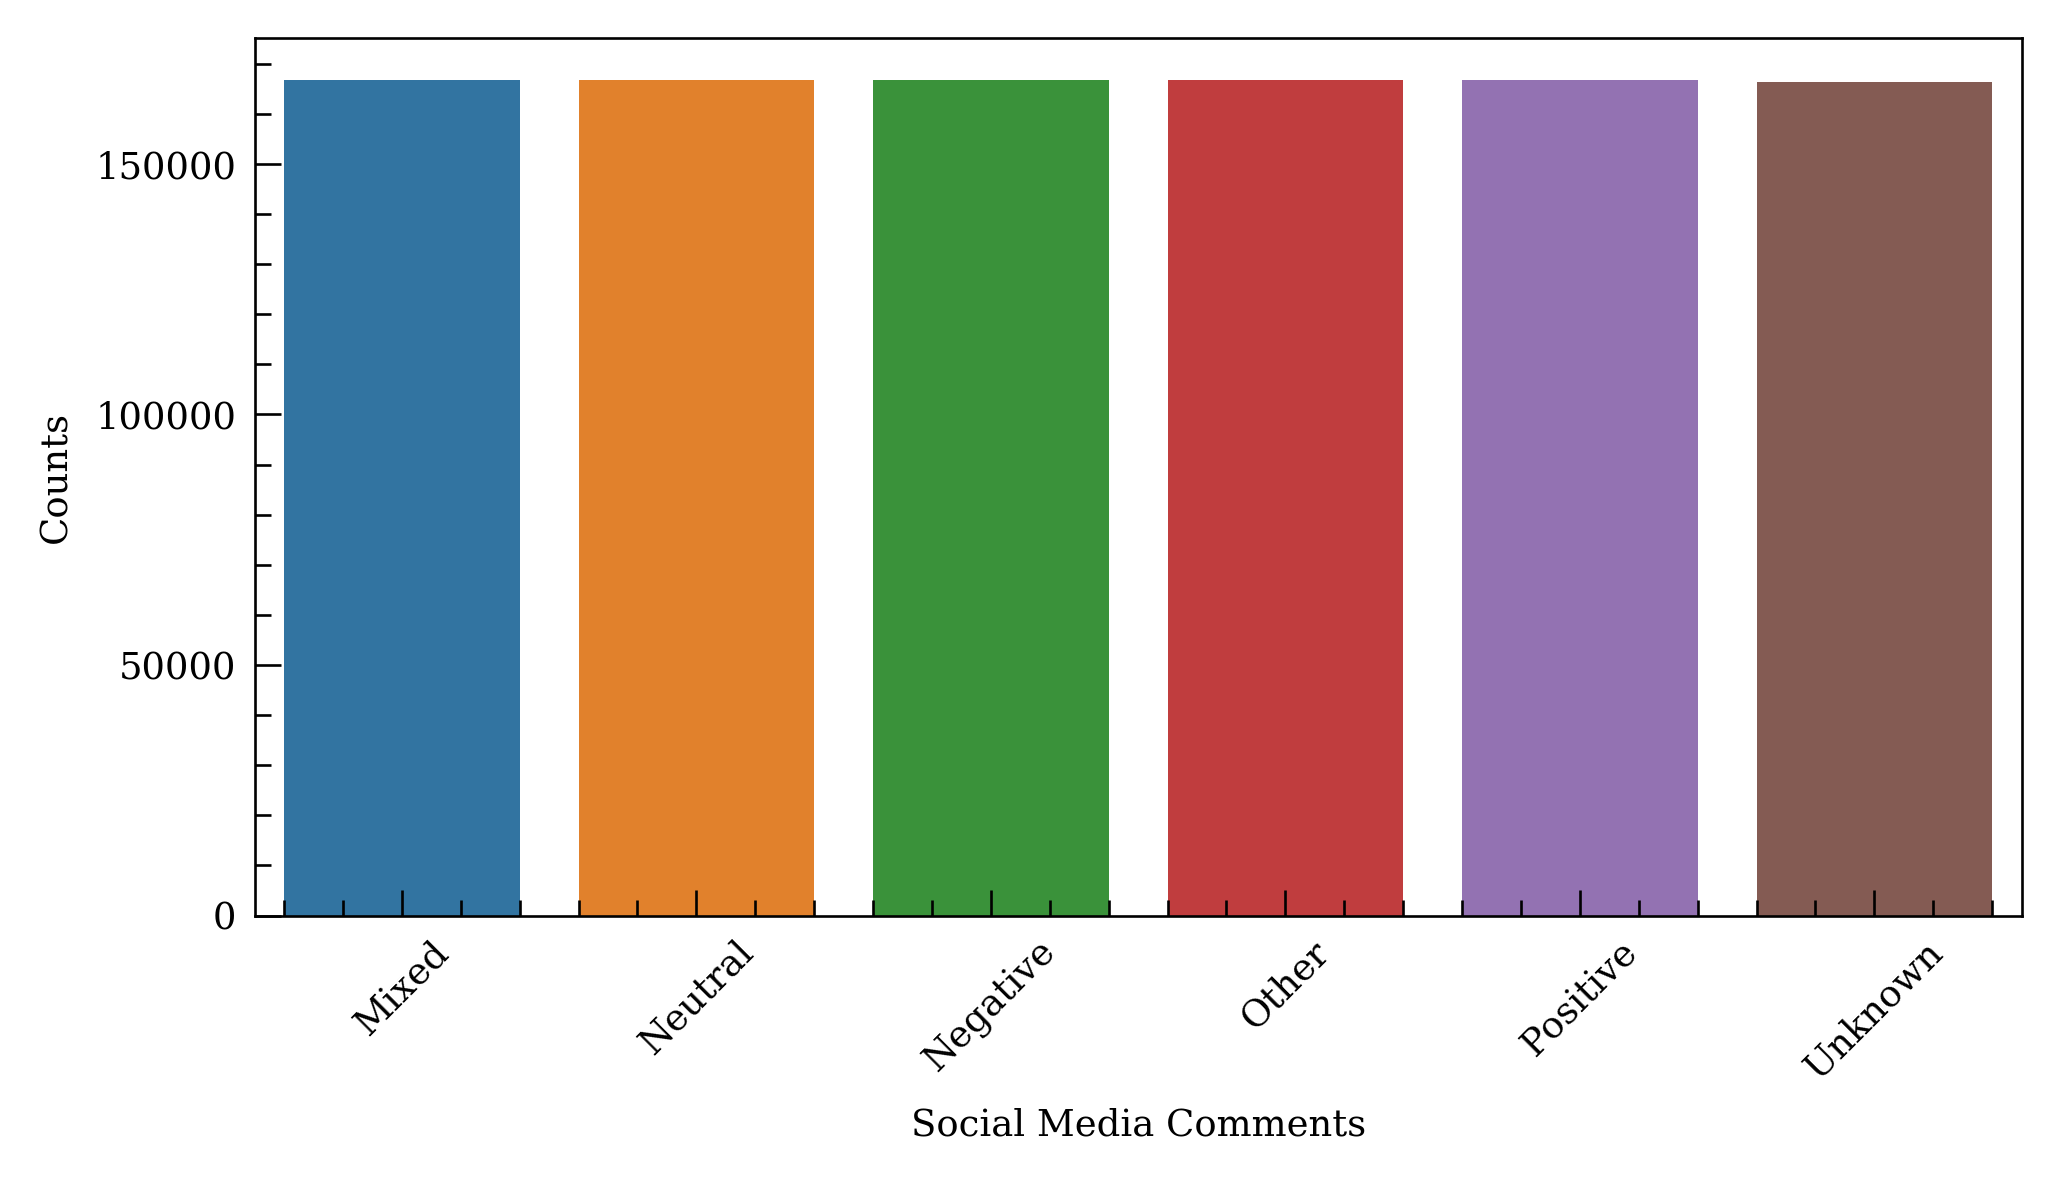

In [108]:
# Counterplot corresponding to Social Media Comments column
sns.countplot(x='Social Media Comments', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('Social Media Comments', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

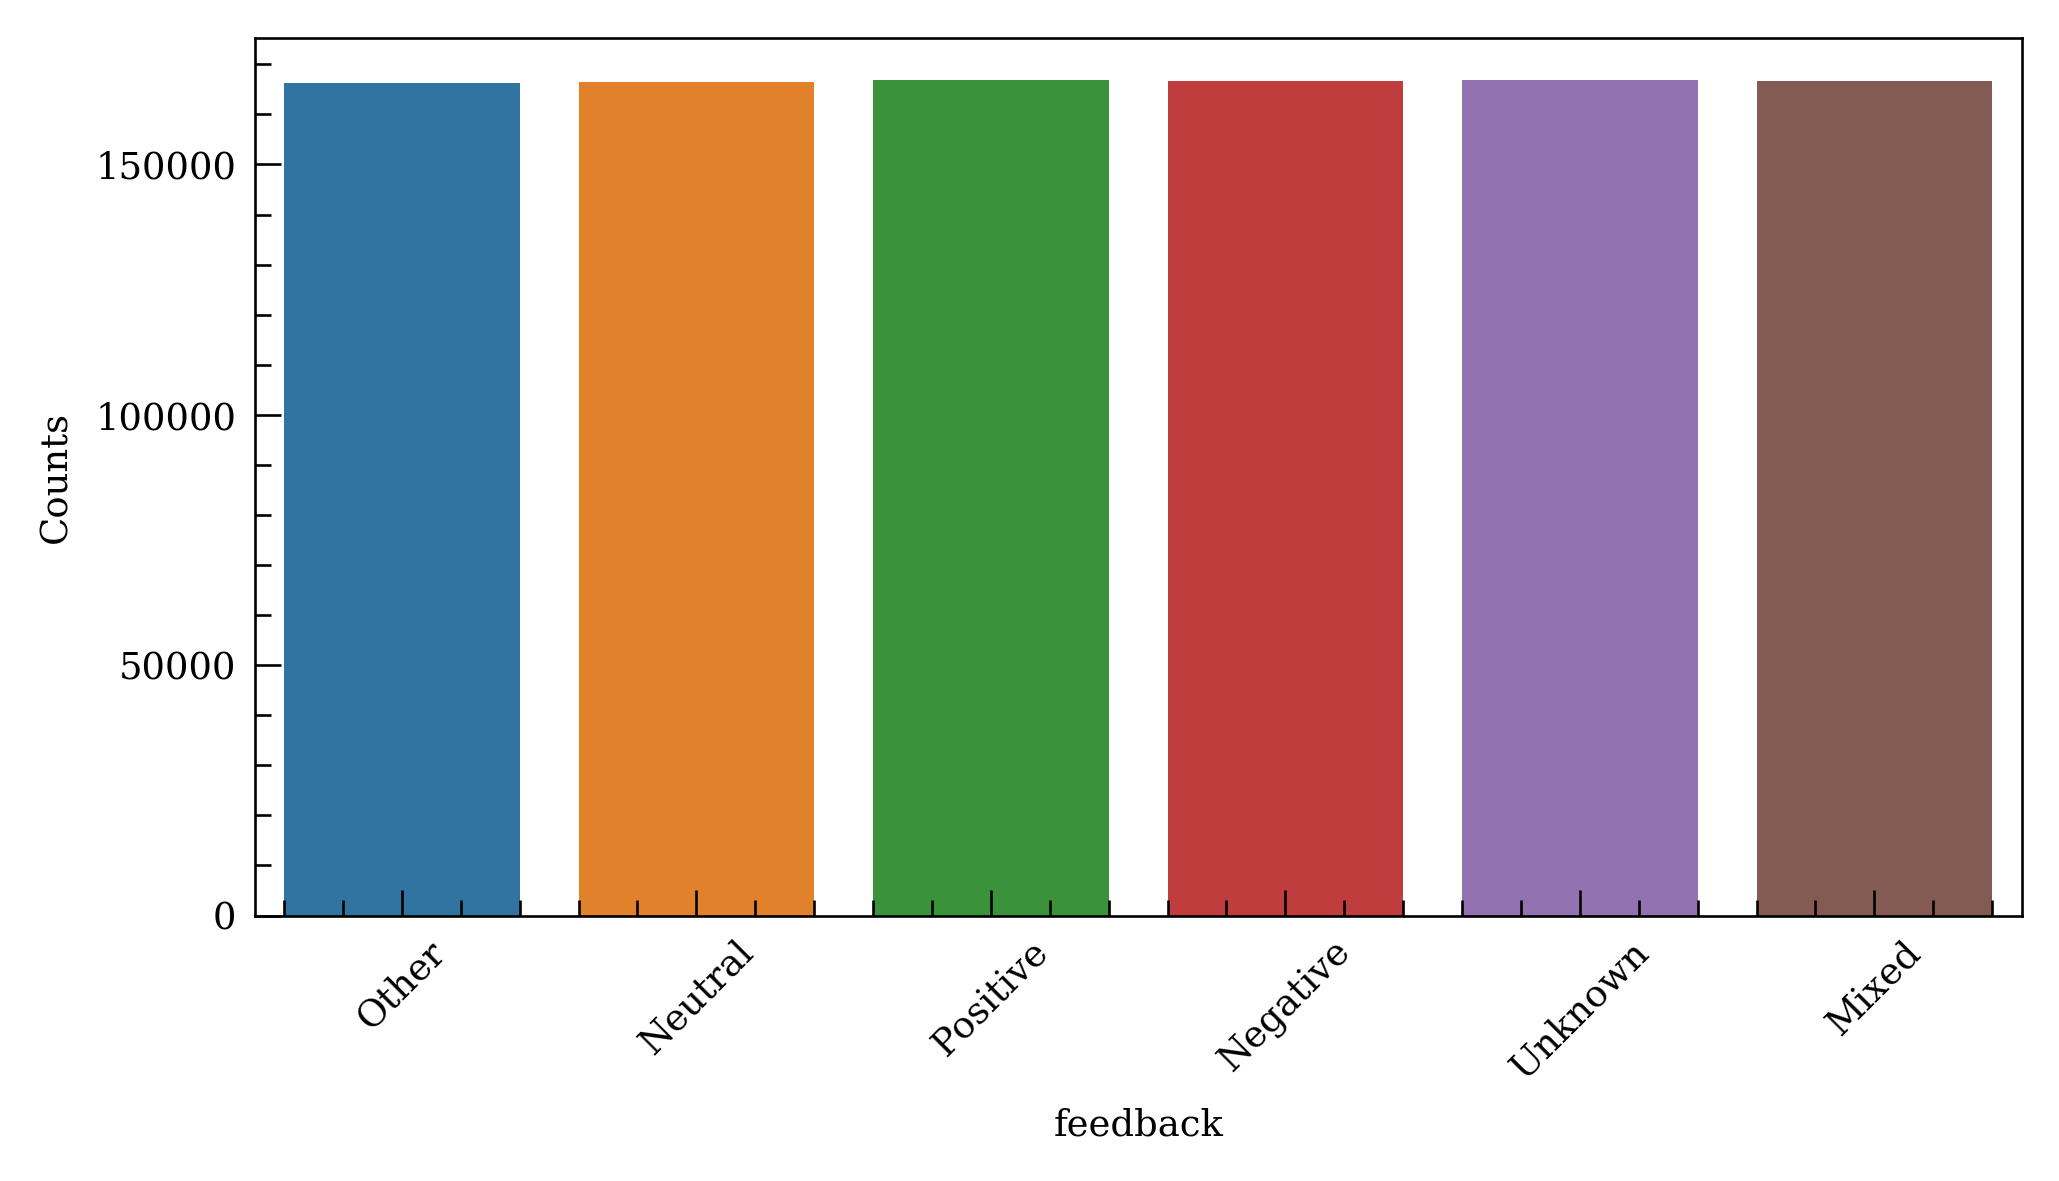

In [112]:
# Counterplot corresponding to feedback column
sns.countplot(x='feedback', data=df, figure=plt.figure(figsize=(6,3), dpi=380))
plt.xlabel('feedback', fontsize=7)
plt.ylabel('Counts', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(rotation=45.0)
plt.show()

Based on what is seen in the plots above, it seems that the dataset is distributed highly uniformly.

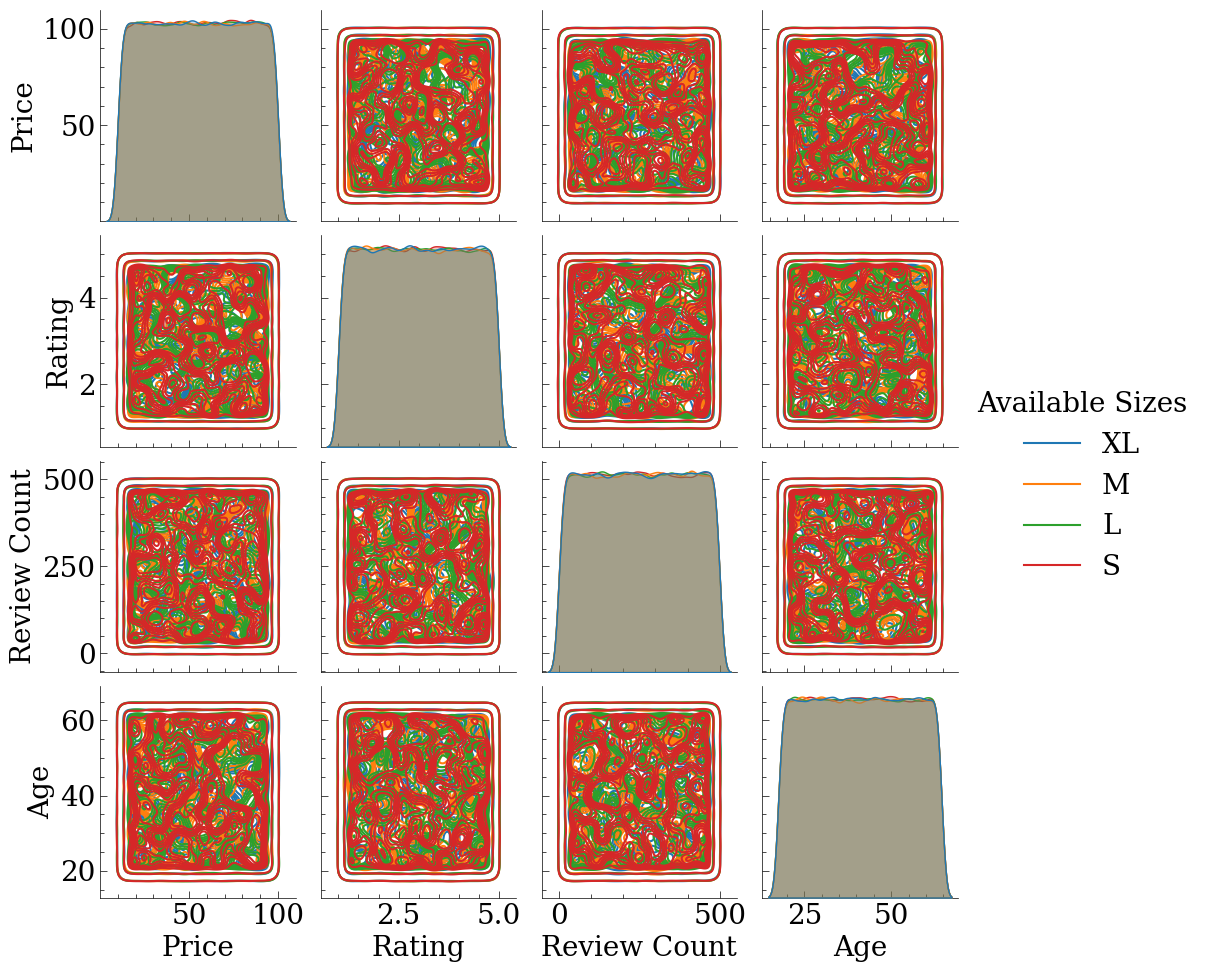

In [115]:
# Pairplot
sns.pairplot(data=df, hue='Available Sizes', kind='kde')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [124]:
# Pairplot
sns.pairplot(data=df[df.AvailableSizes == 'XL'], kind='kde', corner=True)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

SyntaxError: unexpected character after line continuation character (2944744185.py, line 2)

<bound method NDFrame.to_sql of        Product Name      Price              Brand     Category Description  \
0              T5D3  97.509966       Ralph Lauren     Footwear         Bad   
1              Y0V7  52.341277          Ted Baker         Tops    Not Good   
2              N9Q4  15.430975             Jigsaw     Footwear    Very Bad   
3              V2T6  81.116542  Alexander McQueen    Outerwear    Not Good   
4              S7Y1  31.633686     Tommy Hilfiger      Bottoms   Very Good   
...             ...        ...                ...          ...         ...   
999995         K9C7  16.255998           Mulberry  Accessories        Best   
999996         E5I5  78.555545           Mulberry   Activewear        Best   
999997         Y0C9  34.379639           Mulberry         Tops    Not Good   
999998         B1D8  62.343618       Ralph Lauren         Tops        Best   
999999         Q6J1  57.674668           Burberry      Jewelry         Bad   

          Rating  Review Count 